In [133]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
import random as rand
from sklearn import preprocessing 

In [134]:
np.random.seed(26)
df = pd.read_csv('Preprocessed_Data_2019_2020.csv')

feature_names = df.columns
for i in range(len(feature_names)):
 print(str(i), "\t", str(feature_names[i]),"\t\t\t", str(type(df.iloc[0,i])))

0 	 FULL NAME 			 <class 'str'>
1 	 TEAM 			 <class 'str'>
2 	 WingSpan(cm) 			 <class 'numpy.float64'>
3 	 Height(cm) 			 <class 'numpy.float64'>
4 	 POS 			 <class 'str'>
5 	 AGE 			 <class 'numpy.float64'>
6 	 GP 			 <class 'numpy.int64'>
7 	 MPG 			 <class 'numpy.float64'>
8 	 MIN%Minutes Percentage 			 <class 'numpy.float64'>
9 	 USG%Usage Rate 			 <class 'numpy.float64'>
10 	 TO%Turnover Rate 			 <class 'numpy.float64'>
11 	 FTA 			 <class 'numpy.int64'>
12 	 FT 			 <class 'numpy.float64'>
13 	 FT% 			 <class 'numpy.float64'>
14 	 2PA 			 <class 'numpy.int64'>
15 	 2P 			 <class 'numpy.float64'>
16 	 2P% 			 <class 'numpy.float64'>
17 	 3PA 			 <class 'numpy.int64'>
18 	 3PC 			 <class 'numpy.int64'>
19 	 3P 			 <class 'numpy.float64'>
20 	 3P% 			 <class 'numpy.float64'>
21 	 eFG 			 <class 'numpy.float64'>
22 	 eFG%Effective Shooting Percentage 			 <class 'numpy.float64'>
23 	 TS 			 <class 'numpy.float64'>
24 	 TS%True Shooting Percentage 			 <class 'numpy.float64'>
25 	 PPGPo

In [156]:
df = df.dropna()
columns_to_norm = ['GP', 'MPG',
       'MIN%Minutes Percentage', 'USG%Usage Rate', 'TO%Turnover Rate', 'FTA',
       'FT','2PA', '2P', '3PA', 'eFG', 'TS', 'PPGPoints per game.',
       'RPGRebounds per game.', 'TRB%Total Rebound Percentage',
       'APGAssists per game.', 'Assist Percentage', 'SPGSteals per game.',
       'BPGBlocks per game.', 'TOPGTurnovers per game.', 'VI', 'ORTG', 'DRTG','WingSpan(cm)','Height(cm)']
scaler = preprocessing.StandardScaler().fit(df[columns_to_norm])
N_Data = scaler.transform(df[columns_to_norm])
df1 = pd.DataFrame(N_Data, columns = ['GP', 'MPG',
       'MIN%Minutes Percentage', 'USG%Usage Rate', 'TO%Turnover Rate', 'FTA',
       'FT','2PA', '2P', '3PA', 'eFG', 'TS', 'PPGPoints per game.',
       'RPGRebounds per game.', 'TRB%Total Rebound Percentage',
       'APGAssists per game.', 'Assist Percentage', 'SPGSteals per game.',
       'BPGBlocks per game.', 'TOPGTurnovers per game.', 'VI', 'ORTG', 'DRTG','WingSpan(cm)','Height(cm)'])

In [157]:
df1['Name']=df['FULL NAME']
df1['POS']=df['POS']
df1['3P'] = df['3P']
df1['3PC'] = df['3PC']

In [159]:
df1['3PC']

0       0.0
1       NaN
2       0.0
3       0.0
4       0.0
       ... 
1932    NaN
1933    NaN
1934    0.0
1935    0.0
1936    NaN
Name: 3PC, Length: 1937, dtype: float64

In [160]:
df1 = df1.dropna()
df1 = df1.sample(frac = 1) 
train_proportion = 0.8
test_proportion = 0.1
n = len(df1)
print('Size of dataset: ', str(n))

t = int(train_proportion * n)
t1 = int(test_proportion*n)
target = df1['3PC']
target_columns = ['3P%','3P','3PC']
data = df1.loc[:, ~df1.columns.isin(target_columns)]
# the following variable records the features of examples in the training set
train_x = data.iloc[:t]
# the following variable records the features of examples in the test set
test_x = data.iloc[t+t1:]
# the following variable records the labels of examples in the training set
train_y = target[:t]
# the following variable records the labels of examples in the test set
test_y = target[t+t1:]

valid_x = data.iloc[t:t+t1]
valid_y = target[t:t+t1]


Size of dataset:  1606


In [161]:
df1.shape

(1606, 29)

In [162]:
target.shape

(1606,)

In [163]:
def string_to_float(string):
     try:
        return float(string)
     except:
        return 0.0
    
labels_real = [
 'GP',   
 'MPG',
 'WingSpan(cm)', 
 'FT',
 'VI',
 '3PA',
 'PPGPoints per game.',
 'ORTG','2P','Height(cm)',
 'RPGRebounds per game.',
 'TOPGTurnovers per game.',
 'BPGBlocks per game.',
 'SPGSteals per game.'
]

train_vals_real = np.asarray(train_x[labels_real])

valid_vals_real = np.asarray(valid_x[labels_real])
test_vals_real = np.asarray(test_x[labels_real])

train_vals = np.concatenate((train_vals_real,np.ones((len(train_vals_real[:,0]),1))), axis = 1)
valid_vals = np.concatenate((valid_vals_real,np.ones((len(valid_vals_real[:,0]),1))), axis = 1)
test_vals = np.concatenate((test_vals_real,np.ones((len(test_vals_real[:,0]),1))), axis = 1)

In [164]:
cat_labels = [
  'POS'
]

#Sets of all categories in a particular column
cats_sets = [train_x.loc[:, label].fillna('NaN').unique() for label in cat_labels]

def onehot(column=None, col=None):
    column = column.astype(pd.CategoricalDtype(categories = col))
    hot_encode = pd.get_dummies(column)
    
    return np.asarray(hot_encode)

In [165]:
labels = ['GP',   
 'MPG',
 'WingSpan(cm)', 
 'FT',
 'VI',
 '3PA',
 'PPGPoints per game.',
 'ORTG','2P','Height(cm)',
 'RPGRebounds per game.',
 'TOPGTurnovers per game.',
 'BPGBlocks per game.',
 'SPGSteals per game.','POS']
train_col = train_x[labels]

In [166]:
trv = np.zeros((len(train_x),1))
for i in range(len(cat_labels)):
    trv = np.concatenate((trv,onehot(train_x[cat_labels[i]],cats_sets[i])),axis = 1)
     
train_cat_vals = trv[:,1:]

vv = np.zeros((len(valid_x),1))
for i in range(len(cat_labels)):
    vv = np.concatenate((vv,onehot(valid_x[cat_labels[i]],cats_sets[i])),axis = 1)

valid_cat_vals = vv[:,1:]

tv = np.zeros((len(test_x),1))
for i in range(len(cat_labels)):
    tv = np.concatenate((tv,onehot(test_x[cat_labels[i]],cats_sets[i])),axis = 1)
    
test_cat_vals = tv[:,1:]

In [167]:
train_vals1 = np.concatenate((train_vals,train_cat_vals),axis = 1)
valid_vals1 = np.concatenate((valid_vals,valid_cat_vals),axis = 1)
test_vals1 = np.concatenate((test_vals,test_cat_vals),axis = 1)
train_ridge = np.concatenate((train_vals_real,train_cat_vals),axis = 1)
valid_ridge = np.concatenate((valid_vals_real,valid_cat_vals),axis = 1)
test_ridge = np.concatenate((test_vals_real,test_cat_vals),axis = 1)


In [168]:
train_vals1.shape

(1284, 22)

In [145]:
from sklearn import svm
from sklearn.svm import SVC
HLoss = []
R = []
lw = []
m = 0
k = 0
for i in range(100):
    j = (i+1)*0.01
    clf = svm.LinearSVC(penalty = 'l2',loss = 'hinge',C = (1/j), 
                        max_iter = 100000,  random_state = 42).fit(train_ridge,train_y)
    train_pred = clf.predict(valid_ridge)
    HLoss.append(sum(train_pred!=valid_y)/len(valid_y))
    R.append(j)
 

Best Regularizer Hinge : 0.01

In [146]:
from sklearn.linear_model import LogisticRegression
LLoss = []
R = []
lw = []
m = 0
k = 0
for i in range(100):
    j = (i+1)*0.01
    clf = LogisticRegression(C = (1/j), max_iter = 100000,random_state=42
                             ,fit_intercept = True).fit(train_ridge,train_y)
    train_pred = clf.predict(valid_ridge)
    LLoss.append(sum(train_pred!=valid_y)/len(valid_y))
    R.append(j)
    

Best Regularizer Logistic: 0.01

In [147]:
clf1 = LogisticRegression(C = (1/0.01), max_iter = 100000,random_state=42
                             ,fit_intercept = True).fit(train_ridge,train_y)
clf2 = svm.LinearSVC(penalty = 'l2',loss = 'hinge',C = (1/0.01), 
                        max_iter = 100000,  random_state = 42).fit(train_ridge,train_y)

In [148]:
def print_coefs(results):
    print('Intercept coefficient:\t', results.intercept_)
    for i in range(len(train_col.columns[:-1])):
        print('Coefficient of', train_col.columns[i], ':\t', results.coef_[0][i])

In [149]:
print('Intercept and Weights learned for Logistic model:\n')
print_coefs(clf1)

Intercept and Weights learned for Logistic model:

Intercept coefficient:	 [-0.60595894]
Coefficient of GP :	 -0.13807616944702805
Coefficient of MPG :	 0.3826941603258544
Coefficient of WingSpan(cm) :	 -0.046703521399591705
Coefficient of FT :	 -0.09316927457712183
Coefficient of VI :	 0.09142614163144985
Coefficient of 3PA :	 0.17000774095656876
Coefficient of PPGPoints per game. :	 -0.36494262332796534
Coefficient of ORTG :	 -0.011029929427230344
Coefficient of 2P :	 0.07297452570518355
Coefficient of Height(cm) :	 0.11484072332150157
Coefficient of RPGRebounds per game. :	 -0.20368412157365964
Coefficient of TOPGTurnovers per game. :	 0.11071262453683826
Coefficient of BPGBlocks per game. :	 0.09578026195304898
Coefficient of SPGSteals per game. :	 -0.10000702071682753


In [151]:
test_y2 = np.asarray(test_y)
mrl = 0

clf4 = LogisticRegression(C = (1/0.01), max_iter = 100000,random_state=42
                             ,fit_intercept = True).fit(train_ridge,train_y)

test_pred_log = clf4.predict(test_ridge)
#tph = np.empty(len(test_pred_hinge))
#tph1 = np.empty(len(test_pred_log))

for i in range(len(test_y2)):
    if test_y2[i]!=test_pred_log[i]:
        mrl+=1
        
print('The misclassification rate for Logistic Regression is : {}%'.format(mrl/len(test_y2)*100))

IndexError: index 162 is out of bounds for axis 0 with size 162

In [152]:
test_y

1707    1
1708    0
1709    0
1710    0
1712    0
       ..
2438    1
2439    0
2440    0
2442    0
2443    0
Name: 3PC, Length: 493, dtype: int64

In [205]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [206]:
T = tree.DecisionTreeClassifier(random_state = 2,max_leaf_nodes = 10)
Tree1 = T.fit(train_ridge,train_y)

[Text(228.78, 199.32, 'X[19] <= 0.5\ngini = 0.447\nsamples = 1284\nvalue = [852, 432]'),
 Text(167.4, 163.07999999999998, 'X[8] <= 0.792\ngini = 0.458\nsamples = 1173\nvalue = [757, 416]'),
 Text(111.6, 126.83999999999999, 'X[14] <= 0.5\ngini = 0.442\nsamples = 983\nvalue = [659, 324]'),
 Text(89.28, 90.6, 'X[1] <= 1.212\ngini = 0.416\nsamples = 596\nvalue = [420, 176]'),
 Text(44.64, 54.359999999999985, 'X[6] <= -1.17\ngini = 0.435\nsamples = 501\nvalue = [341, 160]'),
 Text(22.32, 18.119999999999976, 'gini = 0.245\nsamples = 42\nvalue = [36, 6]'),
 Text(66.96000000000001, 18.119999999999976, 'gini = 0.446\nsamples = 459\nvalue = [305, 154]'),
 Text(133.92000000000002, 54.359999999999985, 'X[6] <= 3.317\ngini = 0.28\nsamples = 95\nvalue = [79, 16]'),
 Text(111.6, 18.119999999999976, 'gini = 0.245\nsamples = 91\nvalue = [78, 13]'),
 Text(156.24, 18.119999999999976, 'gini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(133.92000000000002, 90.6, 'gini = 0.472\nsamples = 387\nvalue = [239, 

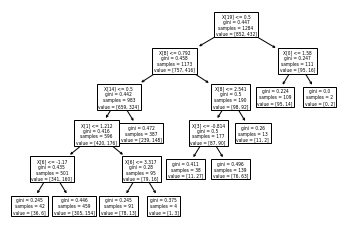

In [207]:
tree.plot_tree(Tree1)

In [208]:
T_X = Tree1.predict(valid_ridge)

In [209]:
valid_y

1808    1.0
674     0.0
947     0.0
1830    1.0
1654    0.0
       ... 
542     1.0
394     1.0
1707    1.0
1124    0.0
365     1.0
Name: 3PC, Length: 160, dtype: float64

In [210]:
T_X

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0.])

In [50]:
from sklearn.ensemble import BaggingClassifier

In [51]:
E7 = BaggingClassifier(base_estimator = DecisionTreeClassifier(random_state = 2,max_leaf_nodes = 10),
                           n_estimators = 150,max_samples = 30)
Tree2 = E7.fit(train_ridge,train_y)

In [53]:
F_X = Tree2.predict(valid_ridge)

In [54]:
F_X1 = Tree2.predict(test_ridge)

In [55]:
mcr = 0

for i in range(len(test_y1)):
    if test_y1[i]!=F_X1[i]:
        mcr+=1
        
print('The misclassification rate for Logistic Regression is : {}%'.format(mcr/len(test_y1)*100))

The misclassification rate for Logistic Regression is : 26.21359223300971%


In [56]:
F_X1

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])

In [169]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras import backend as K
from tensorflow.keras.losses import MeanAbsoluteError, MeanSquaredError, Huber, Hinge, CategoricalHinge, BinaryCrossentropy
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.metrics import Recall, Precision
import os

In [170]:
learning_rate = 0.000005
num_of_features = 22
model = Sequential()
hidden_1_neurons = 32
hidden_2_neurons = 32
output_neurons = 1
# hidden 1
model.add(Dense(hidden_1_neurons, input_shape=(num_of_features,), activation="relu"))
# hidden 2
model.add(Dense(hidden_2_neurons, activation="relu"))
# hidden 3
# model.add(Dense(hidden_3_neurons, activation="relu"))
# hidden 4
# model.add(Dense(hidden_4_neurons, activation="relu"))
# output
model.add(Dense(output_neurons, activation="sigmoid"))
model.compile(optimizer=Adam(learning_rate), loss= BinaryCrossentropy(), metrics = ['accuracy'])

# Include the epoch in the file name (uses `str.format`)
checkpoint_path = "training/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

batch_size = 32

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path, 
    verbose=1, 
    save_weights_only=True,
    save_freq=5*batch_size)

# Save the weights using the `checkpoint_path` format
model.save_weights(checkpoint_path.format(epoch=0))

model.fit(train_vals1, train_y, validation_data=(valid_vals1, valid_y), epochs=20000, batch_size=batch_size, callbacks=[cp_callback])

Epoch 1/20000
41/41 [==============================] - 1s 7ms/step - loss: 0.7534 - accuracy: 0.4338 - val_loss: 0.7301 - val_accuracy: 0.4688
Epoch 2/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.7514 - accuracy: 0.4361 - val_loss: 0.7283 - val_accuracy: 0.4750
Epoch 3/20000
41/41 [==============================] - 0s 5ms/step - loss: 0.7496 - accuracy: 0.4346 - val_loss: 0.7266 - val_accuracy: 0.4750
Epoch 4/20000
36/41 [=========================>....] - ETA: 0s - loss: 0.7507 - accuracy: 0.4340
Epoch 00004: saving model to training\cp-0004.ckpt
41/41 [==============================] - 0s 12ms/step - loss: 0.7477 - accuracy: 0.4369 - val_loss: 0.7249 - val_accuracy: 0.4875
Epoch 5/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.7459 - accuracy: 0.4385 - val_loss: 0.7232 - val_accuracy: 0.4875
Epoch 6/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.7441 - accuracy: 0.4424 - val_loss: 0.7215 - val_accuracy: 0.4938
Epoch 7

41/41 [==============================] - 0s 8ms/step - loss: 0.6914 - accuracy: 0.5319 - val_loss: 0.6733 - val_accuracy: 0.5688
Epoch 48/20000
41/41 [==============================] - 0s 4ms/step - loss: 0.6905 - accuracy: 0.5327 - val_loss: 0.6725 - val_accuracy: 0.5688
Epoch 49/20000
41/41 [==============================] - 0s 8ms/step - loss: 0.6896 - accuracy: 0.5335 - val_loss: 0.6717 - val_accuracy: 0.5625
Epoch 50/20000
41/41 [==============================] - 0s 6ms/step - loss: 0.6888 - accuracy: 0.5374 - val_loss: 0.6710 - val_accuracy: 0.5562
Epoch 51/20000
20/41 [=============>................] - ETA: 0s - loss: 0.6807 - accuracy: 0.5406
Epoch 00051: saving model to training\cp-0051.ckpt
41/41 [==============================] - 0s 10ms/step - loss: 0.6879 - accuracy: 0.5366 - val_loss: 0.6702 - val_accuracy: 0.5562
Epoch 52/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.6871 - accuracy: 0.5374 - val_loss: 0.6695 - val_accuracy: 0.5625
Epoch 53/20000
4

Epoch 94/20000
18/41 [============>.................] - ETA: 0s - loss: 0.6658 - accuracy: 0.6059
Epoch 00094: saving model to training\cp-0094.ckpt
41/41 [==============================] - 0s 8ms/step - loss: 0.6618 - accuracy: 0.6184 - val_loss: 0.6485 - val_accuracy: 0.6313
Epoch 95/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.6614 - accuracy: 0.6215 - val_loss: 0.6482 - val_accuracy: 0.6313
Epoch 96/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.6610 - accuracy: 0.6223 - val_loss: 0.6479 - val_accuracy: 0.6313
Epoch 97/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.6606 - accuracy: 0.6254 - val_loss: 0.6476 - val_accuracy: 0.6313
Epoch 98/20000
 1/41 [..............................] - ETA: 0s - loss: 0.6458 - accuracy: 0.5938
Epoch 00098: saving model to training\cp-0098.ckpt
41/41 [==============================] - 0s 7ms/step - loss: 0.6602 - accuracy: 0.6277 - val_loss: 0.6473 - val_accuracy: 0.6313
Epoch 99/200

41/41 [==============================] - 0s 3ms/step - loss: 0.6479 - accuracy: 0.6597 - val_loss: 0.6385 - val_accuracy: 0.6438
Epoch 140/20000
41/41 [==============================] - 0s 4ms/step - loss: 0.6476 - accuracy: 0.6597 - val_loss: 0.6384 - val_accuracy: 0.6438
Epoch 141/20000
12/41 [=======>......................] - ETA: 0s - loss: 0.6526 - accuracy: 0.6380
Epoch 00141: saving model to training\cp-0141.ckpt
41/41 [==============================] - 0s 9ms/step - loss: 0.6474 - accuracy: 0.6597 - val_loss: 0.6382 - val_accuracy: 0.6438
Epoch 142/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.6472 - accuracy: 0.6597 - val_loss: 0.6380 - val_accuracy: 0.6438
Epoch 143/20000
41/41 [==============================] - 0s 4ms/step - loss: 0.6470 - accuracy: 0.6597 - val_loss: 0.6380 - val_accuracy: 0.6438
Epoch 144/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.6468 - accuracy: 0.6597 - val_loss: 0.6378 - val_accuracy: 0.6438
Epoch 145/20

41/41 [==============================] - 0s 7ms/step - loss: 0.6405 - accuracy: 0.6643 - val_loss: 0.6342 - val_accuracy: 0.6500
Epoch 185/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.6404 - accuracy: 0.6643 - val_loss: 0.6341 - val_accuracy: 0.6500
Epoch 186/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.6402 - accuracy: 0.6643 - val_loss: 0.6341 - val_accuracy: 0.6500
Epoch 187/20000
41/41 [==============================] - 0s 5ms/step - loss: 0.6401 - accuracy: 0.6643 - val_loss: 0.6340 - val_accuracy: 0.6500
Epoch 188/20000
 1/41 [..............................] - ETA: 0s - loss: 0.6149 - accuracy: 0.7500
Epoch 00188: saving model to training\cp-0188.ckpt
41/41 [==============================] - 0s 8ms/step - loss: 0.6400 - accuracy: 0.6643 - val_loss: 0.6340 - val_accuracy: 0.6500
Epoch 189/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.6399 - accuracy: 0.6643 - val_loss: 0.6339 - val_accuracy: 0.6500
Epoch 190/20

Epoch 231/20000
 1/41 [..............................] - ETA: 0s - loss: 0.6095 - accuracy: 0.6875
Epoch 00231: saving model to training\cp-0231.ckpt
41/41 [==============================] - 0s 7ms/step - loss: 0.6359 - accuracy: 0.6643 - val_loss: 0.6324 - val_accuracy: 0.6500
Epoch 232/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.6358 - accuracy: 0.6643 - val_loss: 0.6323 - val_accuracy: 0.6500
Epoch 233/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.6357 - accuracy: 0.6643 - val_loss: 0.6323 - val_accuracy: 0.6500
Epoch 234/20000
41/41 [==============================] - 0s 5ms/step - loss: 0.6357 - accuracy: 0.6643 - val_loss: 0.6323 - val_accuracy: 0.6500
Epoch 235/20000
 1/41 [..............................] - ETA: 0s - loss: 0.6232 - accuracy: 0.7188
Epoch 00235: saving model to training\cp-0235.ckpt
41/41 [==============================] - 0s 7ms/step - loss: 0.6356 - accuracy: 0.6643 - val_loss: 0.6323 - val_accuracy: 0.6500
Epoch 2

41/41 [==============================] - 0s 3ms/step - loss: 0.6330 - accuracy: 0.6643 - val_loss: 0.6318 - val_accuracy: 0.6500
Epoch 277/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.6330 - accuracy: 0.6643 - val_loss: 0.6318 - val_accuracy: 0.6500
Epoch 278/20000
 1/41 [..............................] - ETA: 0s - loss: 0.6148 - accuracy: 0.6875
Epoch 00278: saving model to training\cp-0278.ckpt
41/41 [==============================] - 0s 7ms/step - loss: 0.6329 - accuracy: 0.6643 - val_loss: 0.6318 - val_accuracy: 0.6500
Epoch 279/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.6329 - accuracy: 0.6643 - val_loss: 0.6318 - val_accuracy: 0.6500
Epoch 280/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.6328 - accuracy: 0.6643 - val_loss: 0.6318 - val_accuracy: 0.6500
Epoch 281/20000
27/41 [==================>...........] - ETA: 0s - loss: 0.6301 - accuracy: 0.6667
Epoch 00281: saving model to training\cp-0281.ckpt
41/41 [

41/41 [==============================] - 0s 3ms/step - loss: 0.6309 - accuracy: 0.6643 - val_loss: 0.6319 - val_accuracy: 0.6500
Epoch 322/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.6309 - accuracy: 0.6643 - val_loss: 0.6319 - val_accuracy: 0.6500
Epoch 323/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.6309 - accuracy: 0.6643 - val_loss: 0.6319 - val_accuracy: 0.6500
Epoch 324/20000
29/41 [====================>.........] - ETA: 0s - loss: 0.6279 - accuracy: 0.6659
Epoch 00324: saving model to training\cp-0324.ckpt
41/41 [==============================] - 0s 8ms/step - loss: 0.6308 - accuracy: 0.6643 - val_loss: 0.6319 - val_accuracy: 0.6500
Epoch 325/20000
41/41 [==============================] - 0s 4ms/step - loss: 0.6308 - accuracy: 0.6643 - val_loss: 0.6319 - val_accuracy: 0.6500
Epoch 326/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.6307 - accuracy: 0.6643 - val_loss: 0.6320 - val_accuracy: 0.6500
Epoch 327/20

41/41 [==============================] - 0s 9ms/step - loss: 0.6292 - accuracy: 0.6643 - val_loss: 0.6321 - val_accuracy: 0.6500
Epoch 368/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.6292 - accuracy: 0.6643 - val_loss: 0.6321 - val_accuracy: 0.6500
Epoch 369/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.6291 - accuracy: 0.6643 - val_loss: 0.6321 - val_accuracy: 0.6500
Epoch 370/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.6291 - accuracy: 0.6643 - val_loss: 0.6321 - val_accuracy: 0.6500
Epoch 371/20000
 1/41 [..............................] - ETA: 0s - loss: 0.7670 - accuracy: 0.4375
Epoch 00371: saving model to training\cp-0371.ckpt
41/41 [==============================] - 0s 9ms/step - loss: 0.6291 - accuracy: 0.6643 - val_loss: 0.6321 - val_accuracy: 0.6500
Epoch 372/20000
41/41 [==============================] - 0s 4ms/step - loss: 0.6290 - accuracy: 0.6643 - val_loss: 0.6321 - val_accuracy: 0.6500
Epoch 373/20

41/41 [==============================] - 0s 2ms/step - loss: 0.6277 - accuracy: 0.6643 - val_loss: 0.6324 - val_accuracy: 0.6500
Epoch 414/20000
 1/41 [..............................] - ETA: 0s - loss: 0.6095 - accuracy: 0.7188
Epoch 00414: saving model to training\cp-0414.ckpt
41/41 [==============================] - 0s 7ms/step - loss: 0.6277 - accuracy: 0.6643 - val_loss: 0.6324 - val_accuracy: 0.6500
Epoch 415/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.6276 - accuracy: 0.6643 - val_loss: 0.6324 - val_accuracy: 0.6500
Epoch 416/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.6276 - accuracy: 0.6643 - val_loss: 0.6324 - val_accuracy: 0.6500
Epoch 417/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.6276 - accuracy: 0.6643 - val_loss: 0.6324 - val_accuracy: 0.6500
Epoch 418/20000
 1/41 [..............................] - ETA: 0s - loss: 0.6959 - accuracy: 0.5625
Epoch 00418: saving model to training\cp-0418.ckpt
41/41 [

41/41 [==============================] - 0s 2ms/step - loss: 0.6263 - accuracy: 0.6651 - val_loss: 0.6327 - val_accuracy: 0.6500
Epoch 459/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.6263 - accuracy: 0.6651 - val_loss: 0.6327 - val_accuracy: 0.6500
Epoch 460/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.6263 - accuracy: 0.6651 - val_loss: 0.6327 - val_accuracy: 0.6500
Epoch 461/20000
 1/41 [..............................] - ETA: 0s - loss: 0.5995 - accuracy: 0.6875
Epoch 00461: saving model to training\cp-0461.ckpt
41/41 [==============================] - 0s 7ms/step - loss: 0.6262 - accuracy: 0.6651 - val_loss: 0.6327 - val_accuracy: 0.6500
Epoch 462/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.6262 - accuracy: 0.6651 - val_loss: 0.6327 - val_accuracy: 0.6500
Epoch 463/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.6262 - accuracy: 0.6651 - val_loss: 0.6327 - val_accuracy: 0.6500
Epoch 464/20

 1/41 [..............................] - ETA: 0s - loss: 0.5663 - accuracy: 0.7500
Epoch 00504: saving model to training\cp-0504.ckpt
41/41 [==============================] - 0s 7ms/step - loss: 0.6250 - accuracy: 0.6651 - val_loss: 0.6328 - val_accuracy: 0.6500
Epoch 505/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.6250 - accuracy: 0.6651 - val_loss: 0.6328 - val_accuracy: 0.6500
Epoch 506/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.6249 - accuracy: 0.6651 - val_loss: 0.6328 - val_accuracy: 0.6500
Epoch 507/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.6249 - accuracy: 0.6651 - val_loss: 0.6328 - val_accuracy: 0.6500
Epoch 508/20000
 1/41 [..............................] - ETA: 0s - loss: 0.5776 - accuracy: 0.6875
Epoch 00508: saving model to training\cp-0508.ckpt
41/41 [==============================] - 0s 9ms/step - loss: 0.6249 - accuracy: 0.6651 - val_loss: 0.6329 - val_accuracy: 0.6500
Epoch 509/20000
41/41 [

41/41 [==============================] - 0s 3ms/step - loss: 0.6238 - accuracy: 0.6651 - val_loss: 0.6330 - val_accuracy: 0.6500
Epoch 551/20000
 1/41 [..............................] - ETA: 0s - loss: 0.5392 - accuracy: 0.7812
Epoch 00551: saving model to training\cp-0551.ckpt
41/41 [==============================] - 0s 8ms/step - loss: 0.6237 - accuracy: 0.6651 - val_loss: 0.6330 - val_accuracy: 0.6500
Epoch 552/20000
41/41 [==============================] - 0s 4ms/step - loss: 0.6237 - accuracy: 0.6651 - val_loss: 0.6330 - val_accuracy: 0.6500
Epoch 553/20000
41/41 [==============================] - 0s 4ms/step - loss: 0.6237 - accuracy: 0.6651 - val_loss: 0.6330 - val_accuracy: 0.6500
Epoch 554/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.6237 - accuracy: 0.6651 - val_loss: 0.6330 - val_accuracy: 0.6500
Epoch 555/20000
 1/41 [..............................] - ETA: 0s - loss: 0.6656 - accuracy: 0.6250
Epoch 00555: saving model to training\cp-0555.ckpt
41/41 [

41/41 [==============================] - 0s 6ms/step - loss: 0.6226 - accuracy: 0.6651 - val_loss: 0.6334 - val_accuracy: 0.6500
Epoch 596/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.6226 - accuracy: 0.6651 - val_loss: 0.6334 - val_accuracy: 0.6500
Epoch 597/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.6226 - accuracy: 0.6651 - val_loss: 0.6334 - val_accuracy: 0.6500
Epoch 598/20000
 1/41 [..............................] - ETA: 0s - loss: 0.6896 - accuracy: 0.5000
Epoch 00598: saving model to training\cp-0598.ckpt
41/41 [==============================] - 0s 7ms/step - loss: 0.6225 - accuracy: 0.6651 - val_loss: 0.6333 - val_accuracy: 0.6500
Epoch 599/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.6225 - accuracy: 0.6651 - val_loss: 0.6334 - val_accuracy: 0.6500
Epoch 600/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.6225 - accuracy: 0.6651 - val_loss: 0.6333 - val_accuracy: 0.6500
Epoch 601/20

41/41 [==============================] - 0s 11ms/step - loss: 0.6215 - accuracy: 0.6659 - val_loss: 0.6336 - val_accuracy: 0.6500
Epoch 641/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.6215 - accuracy: 0.6659 - val_loss: 0.6336 - val_accuracy: 0.6500
Epoch 642/20000
41/41 [==============================] - 0s 4ms/step - loss: 0.6215 - accuracy: 0.6659 - val_loss: 0.6336 - val_accuracy: 0.6500
Epoch 643/20000
41/41 [==============================] - 0s 4ms/step - loss: 0.6215 - accuracy: 0.6659 - val_loss: 0.6336 - val_accuracy: 0.6500
Epoch 644/20000
19/41 [============>.................] - ETA: 0s - loss: 0.6387 - accuracy: 0.6497
Epoch 00644: saving model to training\cp-0644.ckpt
41/41 [==============================] - 0s 8ms/step - loss: 0.6214 - accuracy: 0.6659 - val_loss: 0.6336 - val_accuracy: 0.6500
Epoch 645/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.6214 - accuracy: 0.6659 - val_loss: 0.6337 - val_accuracy: 0.6500
Epoch 646/2

Epoch 687/20000
23/41 [===============>..............] - ETA: 0s - loss: 0.6203 - accuracy: 0.6698
Epoch 00687: saving model to training\cp-0687.ckpt
41/41 [==============================] - 0s 8ms/step - loss: 0.6205 - accuracy: 0.6659 - val_loss: 0.6339 - val_accuracy: 0.6500
Epoch 688/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.6204 - accuracy: 0.6659 - val_loss: 0.6339 - val_accuracy: 0.6500
Epoch 689/20000
41/41 [==============================] - 0s 5ms/step - loss: 0.6204 - accuracy: 0.6659 - val_loss: 0.6339 - val_accuracy: 0.6500
Epoch 690/20000
41/41 [==============================] - 0s 4ms/step - loss: 0.6204 - accuracy: 0.6659 - val_loss: 0.6339 - val_accuracy: 0.6500
Epoch 691/20000
29/41 [====================>.........] - ETA: 0s - loss: 0.6162 - accuracy: 0.6735
Epoch 00691: saving model to training\cp-0691.ckpt
41/41 [==============================] - 0s 8ms/step - loss: 0.6204 - accuracy: 0.6659 - val_loss: 0.6339 - val_accuracy: 0.6500
Epoch 6

41/41 [==============================] - 0s 2ms/step - loss: 0.6195 - accuracy: 0.6651 - val_loss: 0.6341 - val_accuracy: 0.6562
Epoch 733/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.6195 - accuracy: 0.6651 - val_loss: 0.6341 - val_accuracy: 0.6562
Epoch 734/20000
19/41 [============>.................] - ETA: 0s - loss: 0.6029 - accuracy: 0.6875
Epoch 00734: saving model to training\cp-0734.ckpt
41/41 [==============================] - 0s 8ms/step - loss: 0.6194 - accuracy: 0.6651 - val_loss: 0.6341 - val_accuracy: 0.6562
Epoch 735/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.6194 - accuracy: 0.6651 - val_loss: 0.6341 - val_accuracy: 0.6562
Epoch 736/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.6194 - accuracy: 0.6651 - val_loss: 0.6341 - val_accuracy: 0.6562
Epoch 737/20000
41/41 [==============================] - 0s 5ms/step - loss: 0.6194 - accuracy: 0.6651 - val_loss: 0.6341 - val_accuracy: 0.6562
Epoch 738/20

41/41 [==============================] - 0s 8ms/step - loss: 0.6185 - accuracy: 0.6651 - val_loss: 0.6342 - val_accuracy: 0.6562
Epoch 778/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.6185 - accuracy: 0.6651 - val_loss: 0.6342 - val_accuracy: 0.6562
Epoch 779/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.6185 - accuracy: 0.6651 - val_loss: 0.6342 - val_accuracy: 0.6562
Epoch 780/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.6185 - accuracy: 0.6651 - val_loss: 0.6342 - val_accuracy: 0.6562
Epoch 781/20000
 1/41 [..............................] - ETA: 0s - loss: 0.5181 - accuracy: 0.7500
Epoch 00781: saving model to training\cp-0781.ckpt
41/41 [==============================] - 0s 8ms/step - loss: 0.6185 - accuracy: 0.6651 - val_loss: 0.6342 - val_accuracy: 0.6562
Epoch 782/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.6184 - accuracy: 0.6651 - val_loss: 0.6342 - val_accuracy: 0.6562
Epoch 783/20

41/41 [==============================] - 0s 4ms/step - loss: 0.6176 - accuracy: 0.6659 - val_loss: 0.6343 - val_accuracy: 0.6562
Epoch 824/20000
15/41 [=========>....................] - ETA: 0s - loss: 0.6409 - accuracy: 0.6333
Epoch 00824: saving model to training\cp-0824.ckpt
41/41 [==============================] - 0s 9ms/step - loss: 0.6176 - accuracy: 0.6659 - val_loss: 0.6343 - val_accuracy: 0.6562
Epoch 825/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.6175 - accuracy: 0.6659 - val_loss: 0.6343 - val_accuracy: 0.6562
Epoch 826/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.6175 - accuracy: 0.6659 - val_loss: 0.6344 - val_accuracy: 0.6562
Epoch 827/20000
41/41 [==============================] - 0s 6ms/step - loss: 0.6175 - accuracy: 0.6659 - val_loss: 0.6343 - val_accuracy: 0.6562
Epoch 828/20000
 1/41 [..............................] - ETA: 0s - loss: 0.6133 - accuracy: 0.6875
Epoch 00828: saving model to training\cp-0828.ckpt
41/41 [

41/41 [==============================] - 0s 4ms/step - loss: 0.6166 - accuracy: 0.6659 - val_loss: 0.6345 - val_accuracy: 0.6562
Epoch 870/20000
41/41 [==============================] - 0s 5ms/step - loss: 0.6166 - accuracy: 0.6659 - val_loss: 0.6345 - val_accuracy: 0.6562
Epoch 871/20000
 1/41 [..............................] - ETA: 0s - loss: 0.5703 - accuracy: 0.6875
Epoch 00871: saving model to training\cp-0871.ckpt
41/41 [==============================] - 0s 8ms/step - loss: 0.6166 - accuracy: 0.6659 - val_loss: 0.6345 - val_accuracy: 0.6562
Epoch 872/20000
41/41 [==============================] - 0s 4ms/step - loss: 0.6166 - accuracy: 0.6659 - val_loss: 0.6345 - val_accuracy: 0.6562
Epoch 873/20000
41/41 [==============================] - 0s 4ms/step - loss: 0.6165 - accuracy: 0.6659 - val_loss: 0.6345 - val_accuracy: 0.6562
Epoch 874/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.6165 - accuracy: 0.6659 - val_loss: 0.6345 - val_accuracy: 0.6562
Epoch 875/20

41/41 [==============================] - 0s 6ms/step - loss: 0.6157 - accuracy: 0.6674 - val_loss: 0.6345 - val_accuracy: 0.6562
Epoch 915/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.6157 - accuracy: 0.6674 - val_loss: 0.6345 - val_accuracy: 0.6562
Epoch 916/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.6157 - accuracy: 0.6674 - val_loss: 0.6346 - val_accuracy: 0.6562
Epoch 917/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.6157 - accuracy: 0.6674 - val_loss: 0.6346 - val_accuracy: 0.6562
Epoch 918/20000
 1/41 [..............................] - ETA: 0s - loss: 0.5139 - accuracy: 0.8125
Epoch 00918: saving model to training\cp-0918.ckpt
41/41 [==============================] - 0s 10ms/step - loss: 0.6157 - accuracy: 0.6674 - val_loss: 0.6346 - val_accuracy: 0.6562
Epoch 919/20000
41/41 [==============================] - 0s 4ms/step - loss: 0.6156 - accuracy: 0.6674 - val_loss: 0.6345 - val_accuracy: 0.6562
Epoch 920/2

32/41 [======================>.......] - ETA: 0s - loss: 0.6234 - accuracy: 0.6533
Epoch 00960: saving model to training\cp-0960.ckpt
41/41 [==============================] - 0s 7ms/step - loss: 0.6149 - accuracy: 0.6674 - val_loss: 0.6348 - val_accuracy: 0.6562
Epoch 961/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.6148 - accuracy: 0.6674 - val_loss: 0.6348 - val_accuracy: 0.6562
Epoch 962/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.6148 - accuracy: 0.6674 - val_loss: 0.6348 - val_accuracy: 0.6562
Epoch 963/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.6148 - accuracy: 0.6674 - val_loss: 0.6348 - val_accuracy: 0.6562
Epoch 964/20000
29/41 [====================>.........] - ETA: 0s - loss: 0.6132 - accuracy: 0.6627
Epoch 00964: saving model to training\cp-0964.ckpt
41/41 [==============================] - 0s 7ms/step - loss: 0.6148 - accuracy: 0.6674 - val_loss: 0.6348 - val_accuracy: 0.6562
Epoch 965/20000
41/41 [

41/41 [==============================] - 0s 3ms/step - loss: 0.6140 - accuracy: 0.6682 - val_loss: 0.6349 - val_accuracy: 0.6562
Epoch 1007/20000
18/41 [============>.................] - ETA: 0s - loss: 0.6150 - accuracy: 0.6719
Epoch 01007: saving model to training\cp-1007.ckpt
41/41 [==============================] - 0s 7ms/step - loss: 0.6140 - accuracy: 0.6682 - val_loss: 0.6349 - val_accuracy: 0.6562
Epoch 1008/20000
41/41 [==============================] - 0s 4ms/step - loss: 0.6140 - accuracy: 0.6682 - val_loss: 0.6349 - val_accuracy: 0.6562
Epoch 1009/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.6140 - accuracy: 0.6682 - val_loss: 0.6349 - val_accuracy: 0.6562
Epoch 1010/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.6139 - accuracy: 0.6682 - val_loss: 0.6349 - val_accuracy: 0.6562
Epoch 1011/20000
29/41 [====================>.........] - ETA: 0s - loss: 0.6173 - accuracy: 0.6649
Epoch 01011: saving model to training\cp-1011.ckpt
41

41/41 [==============================] - 0s 3ms/step - loss: 0.6132 - accuracy: 0.6690 - val_loss: 0.6350 - val_accuracy: 0.6562
Epoch 1052/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.6132 - accuracy: 0.6690 - val_loss: 0.6350 - val_accuracy: 0.6562
Epoch 1053/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.6132 - accuracy: 0.6690 - val_loss: 0.6350 - val_accuracy: 0.6562
Epoch 1054/20000
 1/41 [..............................] - ETA: 0s - loss: 0.6057 - accuracy: 0.7500
Epoch 01054: saving model to training\cp-1054.ckpt
41/41 [==============================] - 0s 7ms/step - loss: 0.6132 - accuracy: 0.6690 - val_loss: 0.6350 - val_accuracy: 0.6562
Epoch 1055/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.6131 - accuracy: 0.6690 - val_loss: 0.6350 - val_accuracy: 0.6562
Epoch 1056/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.6131 - accuracy: 0.6690 - val_loss: 0.6350 - val_accuracy: 0.6562
Epoch 1

Epoch 1097/20000
 1/41 [..............................] - ETA: 0s - loss: 0.6167 - accuracy: 0.7188
Epoch 01097: saving model to training\cp-1097.ckpt
41/41 [==============================] - 0s 8ms/step - loss: 0.6124 - accuracy: 0.6698 - val_loss: 0.6351 - val_accuracy: 0.6562
Epoch 1098/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.6124 - accuracy: 0.6698 - val_loss: 0.6351 - val_accuracy: 0.6562
Epoch 1099/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.6124 - accuracy: 0.6698 - val_loss: 0.6351 - val_accuracy: 0.6562
Epoch 1100/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.6124 - accuracy: 0.6698 - val_loss: 0.6351 - val_accuracy: 0.6562
Epoch 1101/20000
 1/41 [..............................] - ETA: 0s - loss: 0.5500 - accuracy: 0.6875
Epoch 01101: saving model to training\cp-1101.ckpt
41/41 [==============================] - 0s 6ms/step - loss: 0.6123 - accuracy: 0.6698 - val_loss: 0.6351 - val_accuracy: 0.6562
Ep

41/41 [==============================] - 0s 3ms/step - loss: 0.6116 - accuracy: 0.6698 - val_loss: 0.6352 - val_accuracy: 0.6562
Epoch 1143/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.6116 - accuracy: 0.6698 - val_loss: 0.6352 - val_accuracy: 0.6562
Epoch 1144/20000
 1/41 [..............................] - ETA: 0s - loss: 0.6574 - accuracy: 0.7188
Epoch 01144: saving model to training\cp-1144.ckpt
41/41 [==============================] - 0s 6ms/step - loss: 0.6116 - accuracy: 0.6698 - val_loss: 0.6352 - val_accuracy: 0.6562
Epoch 1145/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.6116 - accuracy: 0.6698 - val_loss: 0.6352 - val_accuracy: 0.6562
Epoch 1146/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.6116 - accuracy: 0.6698 - val_loss: 0.6352 - val_accuracy: 0.6562
Epoch 1147/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.6115 - accuracy: 0.6698 - val_loss: 0.6352 - val_accuracy: 0.6562
Epoch 1

Epoch 1188/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.6108 - accuracy: 0.6706 - val_loss: 0.6353 - val_accuracy: 0.6562
Epoch 1189/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.6108 - accuracy: 0.6706 - val_loss: 0.6353 - val_accuracy: 0.6562
Epoch 1190/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.6108 - accuracy: 0.6706 - val_loss: 0.6354 - val_accuracy: 0.6562
Epoch 1191/20000
 1/41 [..............................] - ETA: 0s - loss: 0.6274 - accuracy: 0.6250
Epoch 01191: saving model to training\cp-1191.ckpt
41/41 [==============================] - 0s 7ms/step - loss: 0.6108 - accuracy: 0.6706 - val_loss: 0.6353 - val_accuracy: 0.6562
Epoch 1192/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.6108 - accuracy: 0.6706 - val_loss: 0.6353 - val_accuracy: 0.6562
Epoch 1193/20000
41/41 [==============================] - 0s 5ms/step - loss: 0.6107 - accuracy: 0.6706 - val_loss: 0.6353 - val_accurac

41/41 [==============================] - 0s 2ms/step - loss: 0.6101 - accuracy: 0.6721 - val_loss: 0.6354 - val_accuracy: 0.6562
Epoch 1234/20000
 1/41 [..............................] - ETA: 0s - loss: 0.5691 - accuracy: 0.6562
Epoch 01234: saving model to training\cp-1234.ckpt
41/41 [==============================] - 0s 7ms/step - loss: 0.6100 - accuracy: 0.6721 - val_loss: 0.6354 - val_accuracy: 0.6562
Epoch 1235/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.6100 - accuracy: 0.6721 - val_loss: 0.6354 - val_accuracy: 0.6562
Epoch 1236/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.6100 - accuracy: 0.6721 - val_loss: 0.6354 - val_accuracy: 0.6562
Epoch 1237/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.6100 - accuracy: 0.6713 - val_loss: 0.6355 - val_accuracy: 0.6562
Epoch 1238/20000
 1/41 [..............................] - ETA: 0s - loss: 0.7202 - accuracy: 0.5625
Epoch 01238: saving model to training\cp-1238.ckpt
41

41/41 [==============================] - 0s 3ms/step - loss: 0.6093 - accuracy: 0.6713 - val_loss: 0.6355 - val_accuracy: 0.6562
Epoch 1279/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.6093 - accuracy: 0.6713 - val_loss: 0.6355 - val_accuracy: 0.6562
Epoch 1280/20000
19/41 [============>.................] - ETA: 0s - loss: 0.5885 - accuracy: 0.6924
Epoch 01280: saving model to training\cp-1280.ckpt
41/41 [==============================] - 0s 9ms/step - loss: 0.6093 - accuracy: 0.6713 - val_loss: 0.6355 - val_accuracy: 0.6562
Epoch 1281/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.6092 - accuracy: 0.6713 - val_loss: 0.6355 - val_accuracy: 0.6562
Epoch 1282/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.6092 - accuracy: 0.6713 - val_loss: 0.6355 - val_accuracy: 0.6562
Epoch 1283/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.6092 - accuracy: 0.6713 - val_loss: 0.6355 - val_accuracy: 0.6562
Epoch 1

Epoch 1324/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.6085 - accuracy: 0.6721 - val_loss: 0.6356 - val_accuracy: 0.6562
Epoch 1325/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.6085 - accuracy: 0.6721 - val_loss: 0.6356 - val_accuracy: 0.6562
Epoch 1326/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.6085 - accuracy: 0.6721 - val_loss: 0.6355 - val_accuracy: 0.6562
Epoch 1327/20000
27/41 [==================>...........] - ETA: 0s - loss: 0.6089 - accuracy: 0.6725
Epoch 01327: saving model to training\cp-1327.ckpt
41/41 [==============================] - 0s 8ms/step - loss: 0.6085 - accuracy: 0.6721 - val_loss: 0.6355 - val_accuracy: 0.6562
Epoch 1328/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.6085 - accuracy: 0.6721 - val_loss: 0.6356 - val_accuracy: 0.6562
Epoch 1329/20000
41/41 [==============================] - 0s 4ms/step - loss: 0.6084 - accuracy: 0.6721 - val_loss: 0.6356 - val_accurac

19/41 [============>.................] - ETA: 0s - loss: 0.6033 - accuracy: 0.6776
Epoch 01370: saving model to training\cp-1370.ckpt
41/41 [==============================] - 0s 7ms/step - loss: 0.6077 - accuracy: 0.6713 - val_loss: 0.6357 - val_accuracy: 0.6562
Epoch 1371/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.6077 - accuracy: 0.6713 - val_loss: 0.6357 - val_accuracy: 0.6562
Epoch 1372/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.6077 - accuracy: 0.6713 - val_loss: 0.6357 - val_accuracy: 0.6562
Epoch 1373/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.6077 - accuracy: 0.6713 - val_loss: 0.6357 - val_accuracy: 0.6562
Epoch 1374/20000
25/41 [=================>............] - ETA: 0s - loss: 0.6068 - accuracy: 0.6787
Epoch 01374: saving model to training\cp-1374.ckpt
41/41 [==============================] - 0s 8ms/step - loss: 0.6077 - accuracy: 0.6713 - val_loss: 0.6357 - val_accuracy: 0.6562
Epoch 1375/20000
41

41/41 [==============================] - 0s 2ms/step - loss: 0.6070 - accuracy: 0.6713 - val_loss: 0.6358 - val_accuracy: 0.6562
Epoch 1416/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.6070 - accuracy: 0.6713 - val_loss: 0.6358 - val_accuracy: 0.6562
Epoch 1417/20000
21/41 [==============>...............] - ETA: 0s - loss: 0.6085 - accuracy: 0.6786
Epoch 01417: saving model to training\cp-1417.ckpt
41/41 [==============================] - 0s 9ms/step - loss: 0.6070 - accuracy: 0.6713 - val_loss: 0.6358 - val_accuracy: 0.6562
Epoch 1418/20000
41/41 [==============================] - 0s 4ms/step - loss: 0.6070 - accuracy: 0.6713 - val_loss: 0.6358 - val_accuracy: 0.6562
Epoch 1419/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.6069 - accuracy: 0.6713 - val_loss: 0.6358 - val_accuracy: 0.6562
Epoch 1420/20000
41/41 [==============================] - 0s 4ms/step - loss: 0.6069 - accuracy: 0.6713 - val_loss: 0.6359 - val_accuracy: 0.6562
Epoch 1

41/41 [==============================] - 0s 9ms/step - loss: 0.6063 - accuracy: 0.6713 - val_loss: 0.6360 - val_accuracy: 0.6562
Epoch 1461/20000
41/41 [==============================] - 0s 5ms/step - loss: 0.6063 - accuracy: 0.6713 - val_loss: 0.6360 - val_accuracy: 0.6562
Epoch 1462/20000
41/41 [==============================] - 0s 4ms/step - loss: 0.6062 - accuracy: 0.6713 - val_loss: 0.6361 - val_accuracy: 0.6562
Epoch 1463/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.6062 - accuracy: 0.6713 - val_loss: 0.6361 - val_accuracy: 0.6562
Epoch 1464/20000
 1/41 [..............................] - ETA: 0s - loss: 0.6214 - accuracy: 0.6250
Epoch 01464: saving model to training\cp-1464.ckpt
41/41 [==============================] - 0s 6ms/step - loss: 0.6062 - accuracy: 0.6713 - val_loss: 0.6360 - val_accuracy: 0.6562
Epoch 1465/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.6062 - accuracy: 0.6713 - val_loss: 0.6360 - val_accuracy: 0.6562
Epoch 1

Epoch 1507/20000
 1/41 [..............................] - ETA: 0s - loss: 0.6068 - accuracy: 0.6562
Epoch 01507: saving model to training\cp-1507.ckpt
41/41 [==============================] - 0s 6ms/step - loss: 0.6055 - accuracy: 0.6706 - val_loss: 0.6363 - val_accuracy: 0.6562
Epoch 1508/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.6055 - accuracy: 0.6706 - val_loss: 0.6363 - val_accuracy: 0.6562
Epoch 1509/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.6055 - accuracy: 0.6706 - val_loss: 0.6363 - val_accuracy: 0.6562
Epoch 1510/20000
41/41 [==============================] - 0s 4ms/step - loss: 0.6055 - accuracy: 0.6706 - val_loss: 0.6363 - val_accuracy: 0.6562
Epoch 1511/20000
 1/41 [..............................] - ETA: 0s - loss: 0.5751 - accuracy: 0.7812
Epoch 01511: saving model to training\cp-1511.ckpt
41/41 [==============================] - 0s 6ms/step - loss: 0.6055 - accuracy: 0.6706 - val_loss: 0.6363 - val_accuracy: 0.6562
Ep

41/41 [==============================] - 0s 3ms/step - loss: 0.6048 - accuracy: 0.6706 - val_loss: 0.6365 - val_accuracy: 0.6562
Epoch 1553/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.6048 - accuracy: 0.6706 - val_loss: 0.6365 - val_accuracy: 0.6562
Epoch 1554/20000
 1/41 [..............................] - ETA: 0s - loss: 0.6132 - accuracy: 0.6562
Epoch 01554: saving model to training\cp-1554.ckpt
41/41 [==============================] - 0s 9ms/step - loss: 0.6048 - accuracy: 0.6706 - val_loss: 0.6365 - val_accuracy: 0.6562
Epoch 1555/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.6048 - accuracy: 0.6706 - val_loss: 0.6365 - val_accuracy: 0.6562
Epoch 1556/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.6048 - accuracy: 0.6706 - val_loss: 0.6365 - val_accuracy: 0.6562
Epoch 1557/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.6047 - accuracy: 0.6706 - val_loss: 0.6366 - val_accuracy: 0.6562
Epoch 1

41/41 [==============================] - 0s 8ms/step - loss: 0.6041 - accuracy: 0.6713 - val_loss: 0.6366 - val_accuracy: 0.6500
Epoch 1598/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.6041 - accuracy: 0.6713 - val_loss: 0.6366 - val_accuracy: 0.6500
Epoch 1599/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.6041 - accuracy: 0.6713 - val_loss: 0.6366 - val_accuracy: 0.6500
Epoch 1600/20000
24/41 [================>.............] - ETA: 0s - loss: 0.5968 - accuracy: 0.6784
Epoch 01600: saving model to training\cp-1600.ckpt
41/41 [==============================] - 0s 9ms/step - loss: 0.6041 - accuracy: 0.6713 - val_loss: 0.6366 - val_accuracy: 0.6500
Epoch 1601/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.6041 - accuracy: 0.6713 - val_loss: 0.6366 - val_accuracy: 0.6500
Epoch 1602/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.6040 - accuracy: 0.6713 - val_loss: 0.6366 - val_accuracy: 0.6500
Epoch 1

41/41 [==============================] - 0s 9ms/step - loss: 0.6034 - accuracy: 0.6706 - val_loss: 0.6367 - val_accuracy: 0.6500
Epoch 1644/20000
41/41 [==============================] - 0s 4ms/step - loss: 0.6034 - accuracy: 0.6706 - val_loss: 0.6367 - val_accuracy: 0.6500
Epoch 1645/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.6034 - accuracy: 0.6706 - val_loss: 0.6367 - val_accuracy: 0.6500
Epoch 1646/20000
41/41 [==============================] - 0s 4ms/step - loss: 0.6034 - accuracy: 0.6706 - val_loss: 0.6367 - val_accuracy: 0.6500
Epoch 1647/20000
33/41 [=======================>......] - ETA: 0s - loss: 0.6028 - accuracy: 0.6723
Epoch 01647: saving model to training\cp-1647.ckpt
41/41 [==============================] - 0s 9ms/step - loss: 0.6034 - accuracy: 0.6706 - val_loss: 0.6367 - val_accuracy: 0.6500
Epoch 1648/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.6033 - accuracy: 0.6706 - val_loss: 0.6367 - val_accuracy: 0.6500
Epoch 1

41/41 [==============================] - 0s 2ms/step - loss: 0.6027 - accuracy: 0.6713 - val_loss: 0.6369 - val_accuracy: 0.6500
Epoch 1690/20000
24/41 [================>.............] - ETA: 0s - loss: 0.6028 - accuracy: 0.6771
Epoch 01690: saving model to training\cp-1690.ckpt
41/41 [==============================] - 0s 8ms/step - loss: 0.6027 - accuracy: 0.6713 - val_loss: 0.6369 - val_accuracy: 0.6500
Epoch 1691/20000
41/41 [==============================] - 0s 4ms/step - loss: 0.6027 - accuracy: 0.6713 - val_loss: 0.6369 - val_accuracy: 0.6500
Epoch 1692/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.6027 - accuracy: 0.6713 - val_loss: 0.6369 - val_accuracy: 0.6500
Epoch 1693/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.6027 - accuracy: 0.6713 - val_loss: 0.6369 - val_accuracy: 0.6500
Epoch 1694/20000
25/41 [=================>............] - ETA: 0s - loss: 0.5992 - accuracy: 0.6700
Epoch 01694: saving model to training\cp-1694.ckpt
41

Epoch 1734/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.6021 - accuracy: 0.6721 - val_loss: 0.6370 - val_accuracy: 0.6500
Epoch 1735/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.6020 - accuracy: 0.6721 - val_loss: 0.6370 - val_accuracy: 0.6500
Epoch 1736/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.6020 - accuracy: 0.6721 - val_loss: 0.6370 - val_accuracy: 0.6500
Epoch 1737/20000
 1/41 [..............................] - ETA: 0s - loss: 0.5268 - accuracy: 0.7812
Epoch 01737: saving model to training\cp-1737.ckpt
41/41 [==============================] - 0s 8ms/step - loss: 0.6020 - accuracy: 0.6721 - val_loss: 0.6371 - val_accuracy: 0.6500
Epoch 1738/20000
41/41 [==============================] - 0s 4ms/step - loss: 0.6020 - accuracy: 0.6721 - val_loss: 0.6370 - val_accuracy: 0.6500
Epoch 1739/20000
41/41 [==============================] - 0s 4ms/step - loss: 0.6020 - accuracy: 0.6721 - val_loss: 0.6370 - val_accurac

20/41 [=============>................] - ETA: 0s - loss: 0.5981 - accuracy: 0.6828
Epoch 01780: saving model to training\cp-1780.ckpt
41/41 [==============================] - 0s 9ms/step - loss: 0.6014 - accuracy: 0.6745 - val_loss: 0.6372 - val_accuracy: 0.6500
Epoch 1781/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.6013 - accuracy: 0.6745 - val_loss: 0.6372 - val_accuracy: 0.6562
Epoch 1782/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.6013 - accuracy: 0.6745 - val_loss: 0.6372 - val_accuracy: 0.6562
Epoch 1783/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.6013 - accuracy: 0.6745 - val_loss: 0.6372 - val_accuracy: 0.6562
Epoch 1784/20000
 1/41 [..............................] - ETA: 0s - loss: 0.6057 - accuracy: 0.6250
Epoch 01784: saving model to training\cp-1784.ckpt
41/41 [==============================] - 0s 9ms/step - loss: 0.6013 - accuracy: 0.6745 - val_loss: 0.6373 - val_accuracy: 0.6562
Epoch 1785/20000
41

Epoch 1826/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.6007 - accuracy: 0.6745 - val_loss: 0.6374 - val_accuracy: 0.6562
Epoch 1827/20000
 1/41 [..............................] - ETA: 0s - loss: 0.6007 - accuracy: 0.6250
Epoch 01827: saving model to training\cp-1827.ckpt
41/41 [==============================] - 0s 7ms/step - loss: 0.6006 - accuracy: 0.6745 - val_loss: 0.6374 - val_accuracy: 0.6562
Epoch 1828/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.6006 - accuracy: 0.6745 - val_loss: 0.6374 - val_accuracy: 0.6562
Epoch 1829/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.6006 - accuracy: 0.6745 - val_loss: 0.6375 - val_accuracy: 0.6562
Epoch 1830/20000
41/41 [==============================] - 0s 5ms/step - loss: 0.6006 - accuracy: 0.6745 - val_loss: 0.6374 - val_accuracy: 0.6562
Epoch 1831/20000
 1/41 [..............................] - ETA: 0s - loss: 0.5161 - accuracy: 0.7500
Epoch 01831: saving model to trainin

41/41 [==============================] - 0s 3ms/step - loss: 0.6000 - accuracy: 0.6752 - val_loss: 0.6375 - val_accuracy: 0.6562
Epoch 1872/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.6000 - accuracy: 0.6752 - val_loss: 0.6375 - val_accuracy: 0.6562
Epoch 1873/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.6000 - accuracy: 0.6752 - val_loss: 0.6375 - val_accuracy: 0.6562
Epoch 1874/20000
 1/41 [..............................] - ETA: 0s - loss: 0.5746 - accuracy: 0.6875
Epoch 01874: saving model to training\cp-1874.ckpt
41/41 [==============================] - 0s 8ms/step - loss: 0.5999 - accuracy: 0.6752 - val_loss: 0.6375 - val_accuracy: 0.6562
Epoch 1875/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.5999 - accuracy: 0.6752 - val_loss: 0.6375 - val_accuracy: 0.6562
Epoch 1876/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.5999 - accuracy: 0.6752 - val_loss: 0.6376 - val_accuracy: 0.6562
Epoch 1

 1/41 [..............................] - ETA: 0s - loss: 0.5434 - accuracy: 0.7812
Epoch 01917: saving model to training\cp-1917.ckpt
41/41 [==============================] - 0s 8ms/step - loss: 0.5993 - accuracy: 0.6760 - val_loss: 0.6378 - val_accuracy: 0.6562
Epoch 1918/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.5993 - accuracy: 0.6760 - val_loss: 0.6378 - val_accuracy: 0.6562
Epoch 1919/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.5993 - accuracy: 0.6760 - val_loss: 0.6378 - val_accuracy: 0.6562
Epoch 1920/20000
31/41 [=====================>........] - ETA: 0s - loss: 0.6018 - accuracy: 0.6724
Epoch 01920: saving model to training\cp-1920.ckpt
41/41 [==============================] - 0s 7ms/step - loss: 0.5993 - accuracy: 0.6760 - val_loss: 0.6378 - val_accuracy: 0.6562
Epoch 1921/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.5992 - accuracy: 0.6760 - val_loss: 0.6378 - val_accuracy: 0.6562
Epoch 1922/20000
41

Epoch 1963/20000
29/41 [====================>.........] - ETA: 0s - loss: 0.5981 - accuracy: 0.6853
Epoch 01963: saving model to training\cp-1963.ckpt
41/41 [==============================] - 0s 7ms/step - loss: 0.5986 - accuracy: 0.6768 - val_loss: 0.6380 - val_accuracy: 0.6562
Epoch 1964/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5986 - accuracy: 0.6768 - val_loss: 0.6380 - val_accuracy: 0.6562
Epoch 1965/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.5986 - accuracy: 0.6768 - val_loss: 0.6380 - val_accuracy: 0.6562
Epoch 1966/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5986 - accuracy: 0.6768 - val_loss: 0.6380 - val_accuracy: 0.6562
Epoch 1967/20000
23/41 [===============>..............] - ETA: 0s - loss: 0.5912 - accuracy: 0.6916
Epoch 01967: saving model to training\cp-1967.ckpt
41/41 [==============================] - 0s 8ms/step - loss: 0.5986 - accuracy: 0.6768 - val_loss: 0.6380 - val_accuracy: 0.6562
Ep

41/41 [==============================] - 0s 3ms/step - loss: 0.5980 - accuracy: 0.6768 - val_loss: 0.6381 - val_accuracy: 0.6562
Epoch 2009/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.5979 - accuracy: 0.6768 - val_loss: 0.6381 - val_accuracy: 0.6562
Epoch 2010/20000
24/41 [================>.............] - ETA: 0s - loss: 0.5893 - accuracy: 0.6888
Epoch 02010: saving model to training\cp-2010.ckpt
41/41 [==============================] - 0s 9ms/step - loss: 0.5979 - accuracy: 0.6768 - val_loss: 0.6382 - val_accuracy: 0.6562
Epoch 2011/20000
41/41 [==============================] - 0s 6ms/step - loss: 0.5979 - accuracy: 0.6768 - val_loss: 0.6382 - val_accuracy: 0.6562
Epoch 2012/20000
41/41 [==============================] - 0s 4ms/step - loss: 0.5979 - accuracy: 0.6768 - val_loss: 0.6381 - val_accuracy: 0.6562
Epoch 2013/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.5979 - accuracy: 0.6768 - val_loss: 0.6381 - val_accuracy: 0.6562
Epoch 2

41/41 [==============================] - 0s 8ms/step - loss: 0.5973 - accuracy: 0.6768 - val_loss: 0.6385 - val_accuracy: 0.6562
Epoch 2054/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.5973 - accuracy: 0.6760 - val_loss: 0.6385 - val_accuracy: 0.6562
Epoch 2055/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.5973 - accuracy: 0.6760 - val_loss: 0.6385 - val_accuracy: 0.6562
Epoch 2056/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.5973 - accuracy: 0.6768 - val_loss: 0.6385 - val_accuracy: 0.6562
Epoch 2057/20000
 1/41 [..............................] - ETA: 0s - loss: 0.6740 - accuracy: 0.6250
Epoch 02057: saving model to training\cp-2057.ckpt
41/41 [==============================] - 0s 9ms/step - loss: 0.5972 - accuracy: 0.6760 - val_loss: 0.6385 - val_accuracy: 0.6562
Epoch 2058/20000
41/41 [==============================] - 0s 4ms/step - loss: 0.5972 - accuracy: 0.6760 - val_loss: 0.6384 - val_accuracy: 0.6562
Epoch 2

Epoch 2099/20000
41/41 [==============================] - 0s 6ms/step - loss: 0.5966 - accuracy: 0.6760 - val_loss: 0.6385 - val_accuracy: 0.6562
Epoch 2100/20000
19/41 [============>.................] - ETA: 0s - loss: 0.5989 - accuracy: 0.6793
Epoch 02100: saving model to training\cp-2100.ckpt
41/41 [==============================] - 0s 8ms/step - loss: 0.5966 - accuracy: 0.6760 - val_loss: 0.6385 - val_accuracy: 0.6562
Epoch 2101/20000
41/41 [==============================] - 0s 5ms/step - loss: 0.5966 - accuracy: 0.6760 - val_loss: 0.6385 - val_accuracy: 0.6562
Epoch 2102/20000
41/41 [==============================] - 0s 4ms/step - loss: 0.5966 - accuracy: 0.6760 - val_loss: 0.6385 - val_accuracy: 0.6562
Epoch 2103/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.5966 - accuracy: 0.6760 - val_loss: 0.6385 - val_accuracy: 0.6562
Epoch 2104/20000
 1/41 [..............................] - ETA: 0s - loss: 0.4821 - accuracy: 0.8438
Epoch 02104: saving model to trainin

41/41 [==============================] - 0s 3ms/step - loss: 0.5960 - accuracy: 0.6760 - val_loss: 0.6387 - val_accuracy: 0.6562
Epoch 2145/20000
41/41 [==============================] - 0s 5ms/step - loss: 0.5960 - accuracy: 0.6760 - val_loss: 0.6387 - val_accuracy: 0.6562
Epoch 2146/20000
41/41 [==============================] - 0s 4ms/step - loss: 0.5959 - accuracy: 0.6760 - val_loss: 0.6387 - val_accuracy: 0.6562
Epoch 2147/20000
 1/41 [..............................] - ETA: 0s - loss: 0.6493 - accuracy: 0.6875
Epoch 02147: saving model to training\cp-2147.ckpt
41/41 [==============================] - 0s 7ms/step - loss: 0.5959 - accuracy: 0.6760 - val_loss: 0.6387 - val_accuracy: 0.6562
Epoch 2148/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.5959 - accuracy: 0.6760 - val_loss: 0.6387 - val_accuracy: 0.6562
Epoch 2149/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.5959 - accuracy: 0.6760 - val_loss: 0.6387 - val_accuracy: 0.6562
Epoch 2

 1/41 [..............................] - ETA: 0s - loss: 0.5421 - accuracy: 0.6875
Epoch 02190: saving model to training\cp-2190.ckpt
41/41 [==============================] - 0s 8ms/step - loss: 0.5953 - accuracy: 0.6752 - val_loss: 0.6389 - val_accuracy: 0.6625
Epoch 2191/20000
41/41 [==============================] - 0s 4ms/step - loss: 0.5953 - accuracy: 0.6760 - val_loss: 0.6389 - val_accuracy: 0.6625
Epoch 2192/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.5953 - accuracy: 0.6760 - val_loss: 0.6389 - val_accuracy: 0.6625
Epoch 2193/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.5953 - accuracy: 0.6760 - val_loss: 0.6389 - val_accuracy: 0.6625
Epoch 2194/20000
 1/41 [..............................] - ETA: 0s - loss: 0.5559 - accuracy: 0.7500
Epoch 02194: saving model to training\cp-2194.ckpt
41/41 [==============================] - 0s 7ms/step - loss: 0.5953 - accuracy: 0.6760 - val_loss: 0.6389 - val_accuracy: 0.6625
Epoch 2195/20000
41

41/41 [==============================] - 0s 5ms/step - loss: 0.5947 - accuracy: 0.6760 - val_loss: 0.6391 - val_accuracy: 0.6625
Epoch 2236/20000
41/41 [==============================] - 0s 4ms/step - loss: 0.5947 - accuracy: 0.6760 - val_loss: 0.6391 - val_accuracy: 0.6625
Epoch 2237/20000
 1/41 [..............................] - ETA: 0s - loss: 0.5830 - accuracy: 0.6250
Epoch 02237: saving model to training\cp-2237.ckpt
41/41 [==============================] - 0s 7ms/step - loss: 0.5947 - accuracy: 0.6760 - val_loss: 0.6391 - val_accuracy: 0.6625
Epoch 2238/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.5946 - accuracy: 0.6760 - val_loss: 0.6392 - val_accuracy: 0.6625
Epoch 2239/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5946 - accuracy: 0.6760 - val_loss: 0.6392 - val_accuracy: 0.6625
Epoch 2240/20000
32/41 [======================>.......] - ETA: 0s - loss: 0.5977 - accuracy: 0.6758
Epoch 02240: saving model to training\cp-2240.ckpt
41

Epoch 2281/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.5940 - accuracy: 0.6745 - val_loss: 0.6393 - val_accuracy: 0.6625
Epoch 2282/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.5940 - accuracy: 0.6745 - val_loss: 0.6393 - val_accuracy: 0.6625
Epoch 2283/20000
28/41 [===================>..........] - ETA: 0s - loss: 0.6042 - accuracy: 0.6685
Epoch 02283: saving model to training\cp-2283.ckpt
41/41 [==============================] - 0s 7ms/step - loss: 0.5940 - accuracy: 0.6745 - val_loss: 0.6393 - val_accuracy: 0.6625
Epoch 2284/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5940 - accuracy: 0.6745 - val_loss: 0.6393 - val_accuracy: 0.6625
Epoch 2285/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.5940 - accuracy: 0.6745 - val_loss: 0.6393 - val_accuracy: 0.6625
Epoch 2286/20000
41/41 [==============================] - 0s 6ms/step - loss: 0.5940 - accuracy: 0.6745 - val_loss: 0.6393 - val_accurac

41/41 [==============================] - 0s 7ms/step - loss: 0.5934 - accuracy: 0.6760 - val_loss: 0.6395 - val_accuracy: 0.6625
Epoch 2327/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.5934 - accuracy: 0.6760 - val_loss: 0.6395 - val_accuracy: 0.6625
Epoch 2328/20000
41/41 [==============================] - 0s 5ms/step - loss: 0.5934 - accuracy: 0.6760 - val_loss: 0.6395 - val_accuracy: 0.6625
Epoch 2329/20000
41/41 [==============================] - 0s 4ms/step - loss: 0.5933 - accuracy: 0.6760 - val_loss: 0.6395 - val_accuracy: 0.6625
Epoch 2330/20000
24/41 [================>.............] - ETA: 0s - loss: 0.5914 - accuracy: 0.6901
Epoch 02330: saving model to training\cp-2330.ckpt
41/41 [==============================] - 0s 9ms/step - loss: 0.5933 - accuracy: 0.6760 - val_loss: 0.6395 - val_accuracy: 0.6625
Epoch 2331/20000
41/41 [==============================] - 0s 4ms/step - loss: 0.5933 - accuracy: 0.6768 - val_loss: 0.6395 - val_accuracy: 0.6625
Epoch 2

41/41 [==============================] - 0s 3ms/step - loss: 0.5927 - accuracy: 0.6776 - val_loss: 0.6397 - val_accuracy: 0.6625
Epoch 2373/20000
22/41 [===============>..............] - ETA: 0s - loss: 0.5868 - accuracy: 0.6818
Epoch 02373: saving model to training\cp-2373.ckpt
41/41 [==============================] - 0s 8ms/step - loss: 0.5927 - accuracy: 0.6776 - val_loss: 0.6397 - val_accuracy: 0.6625
Epoch 2374/20000
41/41 [==============================] - 0s 4ms/step - loss: 0.5927 - accuracy: 0.6776 - val_loss: 0.6397 - val_accuracy: 0.6625
Epoch 2375/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.5927 - accuracy: 0.6776 - val_loss: 0.6397 - val_accuracy: 0.6625
Epoch 2376/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.5927 - accuracy: 0.6776 - val_loss: 0.6397 - val_accuracy: 0.6625
Epoch 2377/20000
 1/41 [..............................] - ETA: 0s - loss: 0.6848 - accuracy: 0.5000
Epoch 02377: saving model to training\cp-2377.ckpt
41

Epoch 2417/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.5921 - accuracy: 0.6783 - val_loss: 0.6400 - val_accuracy: 0.6625
Epoch 2418/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.5921 - accuracy: 0.6783 - val_loss: 0.6400 - val_accuracy: 0.6625
Epoch 2419/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.5921 - accuracy: 0.6783 - val_loss: 0.6400 - val_accuracy: 0.6625
Epoch 2420/20000
 1/41 [..............................] - ETA: 0s - loss: 0.6175 - accuracy: 0.6562
Epoch 02420: saving model to training\cp-2420.ckpt
41/41 [==============================] - 0s 9ms/step - loss: 0.5920 - accuracy: 0.6783 - val_loss: 0.6400 - val_accuracy: 0.6625
Epoch 2421/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.5920 - accuracy: 0.6783 - val_loss: 0.6400 - val_accuracy: 0.6625
Epoch 2422/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.5920 - accuracy: 0.6783 - val_loss: 0.6400 - val_accurac

 1/41 [..............................] - ETA: 0s - loss: 0.6299 - accuracy: 0.5938
Epoch 02463: saving model to training\cp-2463.ckpt
41/41 [==============================] - 0s 7ms/step - loss: 0.5914 - accuracy: 0.6791 - val_loss: 0.6403 - val_accuracy: 0.6625
Epoch 2464/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.5914 - accuracy: 0.6791 - val_loss: 0.6403 - val_accuracy: 0.6625
Epoch 2465/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5914 - accuracy: 0.6791 - val_loss: 0.6403 - val_accuracy: 0.6625
Epoch 2466/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.5914 - accuracy: 0.6791 - val_loss: 0.6403 - val_accuracy: 0.6625
Epoch 2467/20000
13/41 [========>.....................] - ETA: 0s - loss: 0.5999 - accuracy: 0.6683
Epoch 02467: saving model to training\cp-2467.ckpt
41/41 [==============================] - 0s 9ms/step - loss: 0.5914 - accuracy: 0.6791 - val_loss: 0.6403 - val_accuracy: 0.6625
Epoch 2468/20000
41

41/41 [==============================] - 0s 3ms/step - loss: 0.5908 - accuracy: 0.6799 - val_loss: 0.6405 - val_accuracy: 0.6625
Epoch 2509/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.5908 - accuracy: 0.6799 - val_loss: 0.6406 - val_accuracy: 0.6625
Epoch 2510/20000
 1/41 [..............................] - ETA: 0s - loss: 0.5844 - accuracy: 0.6562
Epoch 02510: saving model to training\cp-2510.ckpt
41/41 [==============================] - 0s 10ms/step - loss: 0.5907 - accuracy: 0.6799 - val_loss: 0.6406 - val_accuracy: 0.6625
Epoch 2511/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.5907 - accuracy: 0.6799 - val_loss: 0.6405 - val_accuracy: 0.6625
Epoch 2512/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.5907 - accuracy: 0.6799 - val_loss: 0.6405 - val_accuracy: 0.6625
Epoch 2513/20000
41/41 [==============================] - 0s 5ms/step - loss: 0.5907 - accuracy: 0.6799 - val_loss: 0.6405 - val_accuracy: 0.6625
Epoch 

41/41 [==============================] - 0s 7ms/step - loss: 0.5901 - accuracy: 0.6791 - val_loss: 0.6406 - val_accuracy: 0.6625
Epoch 2554/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5901 - accuracy: 0.6799 - val_loss: 0.6407 - val_accuracy: 0.6625
Epoch 2555/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5901 - accuracy: 0.6799 - val_loss: 0.6407 - val_accuracy: 0.6625
Epoch 2556/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.5901 - accuracy: 0.6799 - val_loss: 0.6407 - val_accuracy: 0.6625
Epoch 2557/20000
 1/41 [..............................] - ETA: 0s - loss: 0.7014 - accuracy: 0.6250
Epoch 02557: saving model to training\cp-2557.ckpt
41/41 [==============================] - 0s 7ms/step - loss: 0.5901 - accuracy: 0.6791 - val_loss: 0.6407 - val_accuracy: 0.6625
Epoch 2558/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.5900 - accuracy: 0.6799 - val_loss: 0.6406 - val_accuracy: 0.6625
Epoch 2

41/41 [==============================] - 0s 3ms/step - loss: 0.5895 - accuracy: 0.6799 - val_loss: 0.6407 - val_accuracy: 0.6625
Epoch 2600/20000

Epoch 02600: saving model to training\cp-2600.ckpt
41/41 [==============================] - 0s 2ms/step - loss: 0.5894 - accuracy: 0.6799 - val_loss: 0.6407 - val_accuracy: 0.6625
Epoch 2601/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.5894 - accuracy: 0.6799 - val_loss: 0.6407 - val_accuracy: 0.6625
Epoch 2602/20000
41/41 [==============================] - 0s 5ms/step - loss: 0.5894 - accuracy: 0.6799 - val_loss: 0.6407 - val_accuracy: 0.6625
Epoch 2603/20000
34/41 [=======================>......] - ETA: 0s - loss: 0.5847 - accuracy: 0.6893
Epoch 02603: saving model to training\cp-2603.ckpt
41/41 [==============================] - 0s 8ms/step - loss: 0.5894 - accuracy: 0.6799 - val_loss: 0.6407 - val_accuracy: 0.6625
Epoch 2604/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.5894 - accuracy: 0.67

Epoch 2645/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5888 - accuracy: 0.6799 - val_loss: 0.6407 - val_accuracy: 0.6625
Epoch 2646/20000
24/41 [================>.............] - ETA: 0s - loss: 0.5845 - accuracy: 0.6849
Epoch 02646: saving model to training\cp-2646.ckpt
41/41 [==============================] - 0s 9ms/step - loss: 0.5887 - accuracy: 0.6799 - val_loss: 0.6407 - val_accuracy: 0.6625
Epoch 2647/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.5887 - accuracy: 0.6799 - val_loss: 0.6407 - val_accuracy: 0.6625
Epoch 2648/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.5887 - accuracy: 0.6799 - val_loss: 0.6408 - val_accuracy: 0.6625
Epoch 2649/20000
41/41 [==============================] - 0s 5ms/step - loss: 0.5887 - accuracy: 0.6799 - val_loss: 0.6408 - val_accuracy: 0.6625
Epoch 2650/20000
17/41 [===========>..................] - ETA: 0s - loss: 0.5914 - accuracy: 0.6783
Epoch 02650: saving model to trainin

41/41 [==============================] - 0s 3ms/step - loss: 0.5881 - accuracy: 0.6799 - val_loss: 0.6408 - val_accuracy: 0.6625
Epoch 2691/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5881 - accuracy: 0.6799 - val_loss: 0.6408 - val_accuracy: 0.6625
Epoch 2692/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.5881 - accuracy: 0.6799 - val_loss: 0.6408 - val_accuracy: 0.6625
Epoch 2693/20000
 1/41 [..............................] - ETA: 0s - loss: 0.6216 - accuracy: 0.5938
Epoch 02693: saving model to training\cp-2693.ckpt
41/41 [==============================] - 0s 7ms/step - loss: 0.5881 - accuracy: 0.6807 - val_loss: 0.6408 - val_accuracy: 0.6625
Epoch 2694/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.5881 - accuracy: 0.6791 - val_loss: 0.6408 - val_accuracy: 0.6625
Epoch 2695/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.5880 - accuracy: 0.6791 - val_loss: 0.6408 - val_accuracy: 0.6625
Epoch 2

 1/41 [..............................] - ETA: 0s - loss: 0.5141 - accuracy: 0.7812
Epoch 02736: saving model to training\cp-2736.ckpt
41/41 [==============================] - 0s 6ms/step - loss: 0.5874 - accuracy: 0.6791 - val_loss: 0.6411 - val_accuracy: 0.6625
Epoch 2737/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.5874 - accuracy: 0.6791 - val_loss: 0.6412 - val_accuracy: 0.6625
Epoch 2738/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.5874 - accuracy: 0.6791 - val_loss: 0.6412 - val_accuracy: 0.6625
Epoch 2739/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.5874 - accuracy: 0.6791 - val_loss: 0.6412 - val_accuracy: 0.6625
Epoch 2740/20000
 1/41 [..............................] - ETA: 0s - loss: 0.4837 - accuracy: 0.8125
Epoch 02740: saving model to training\cp-2740.ckpt
41/41 [==============================] - 0s 7ms/step - loss: 0.5874 - accuracy: 0.6791 - val_loss: 0.6412 - val_accuracy: 0.6625
Epoch 2741/20000
41

41/41 [==============================] - 0s 3ms/step - loss: 0.5868 - accuracy: 0.6807 - val_loss: 0.6413 - val_accuracy: 0.6562
Epoch 2782/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.5868 - accuracy: 0.6799 - val_loss: 0.6413 - val_accuracy: 0.6562
Epoch 2783/20000
 1/41 [..............................] - ETA: 0s - loss: 0.6311 - accuracy: 0.6562
Epoch 02783: saving model to training\cp-2783.ckpt
41/41 [==============================] - 0s 7ms/step - loss: 0.5868 - accuracy: 0.6807 - val_loss: 0.6413 - val_accuracy: 0.6562
Epoch 2784/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.5868 - accuracy: 0.6807 - val_loss: 0.6413 - val_accuracy: 0.6562
Epoch 2785/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5868 - accuracy: 0.6807 - val_loss: 0.6413 - val_accuracy: 0.6562
Epoch 2786/20000
41/41 [==============================] - 0s 4ms/step - loss: 0.5867 - accuracy: 0.6807 - val_loss: 0.6413 - val_accuracy: 0.6562
Epoch 2

41/41 [==============================] - 0s 8ms/step - loss: 0.5862 - accuracy: 0.6807 - val_loss: 0.6414 - val_accuracy: 0.6562
Epoch 2827/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.5861 - accuracy: 0.6815 - val_loss: 0.6414 - val_accuracy: 0.6562
Epoch 2828/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5861 - accuracy: 0.6815 - val_loss: 0.6414 - val_accuracy: 0.6562
Epoch 2829/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.5861 - accuracy: 0.6815 - val_loss: 0.6414 - val_accuracy: 0.6562
Epoch 2830/20000
 1/41 [..............................] - ETA: 0s - loss: 0.6164 - accuracy: 0.6562
Epoch 02830: saving model to training\cp-2830.ckpt
41/41 [==============================] - 0s 9ms/step - loss: 0.5861 - accuracy: 0.6815 - val_loss: 0.6414 - val_accuracy: 0.6562
Epoch 2831/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5861 - accuracy: 0.6815 - val_loss: 0.6414 - val_accuracy: 0.6562
Epoch 2

Epoch 2872/20000
41/41 [==============================] - 0s 5ms/step - loss: 0.5855 - accuracy: 0.6830 - val_loss: 0.6416 - val_accuracy: 0.6562
Epoch 2873/20000
 1/41 [..............................] - ETA: 0s - loss: 0.6270 - accuracy: 0.6250
Epoch 02873: saving model to training\cp-2873.ckpt
41/41 [==============================] - 0s 8ms/step - loss: 0.5855 - accuracy: 0.6830 - val_loss: 0.6416 - val_accuracy: 0.6562
Epoch 2874/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.5855 - accuracy: 0.6830 - val_loss: 0.6416 - val_accuracy: 0.6562
Epoch 2875/20000
41/41 [==============================] - 0s 6ms/step - loss: 0.5854 - accuracy: 0.6830 - val_loss: 0.6416 - val_accuracy: 0.6562
Epoch 2876/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.5854 - accuracy: 0.6830 - val_loss: 0.6416 - val_accuracy: 0.6562
Epoch 2877/20000
 1/41 [..............................] - ETA: 0s - loss: 0.5593 - accuracy: 0.6562
Epoch 02877: saving model to trainin

41/41 [==============================] - 0s 2ms/step - loss: 0.5848 - accuracy: 0.6846 - val_loss: 0.6417 - val_accuracy: 0.6562
Epoch 2918/20000
41/41 [==============================] - 0s 4ms/step - loss: 0.5848 - accuracy: 0.6846 - val_loss: 0.6417 - val_accuracy: 0.6562
Epoch 2919/20000
41/41 [==============================] - 0s 5ms/step - loss: 0.5848 - accuracy: 0.6846 - val_loss: 0.6417 - val_accuracy: 0.6562
Epoch 2920/20000

Epoch 02920: saving model to training\cp-2920.ckpt
41/41 [==============================] - 0s 3ms/step - loss: 0.5848 - accuracy: 0.6846 - val_loss: 0.6417 - val_accuracy: 0.6562
Epoch 2921/20000
41/41 [==============================] - 0s 4ms/step - loss: 0.5848 - accuracy: 0.6846 - val_loss: 0.6417 - val_accuracy: 0.6562
Epoch 2922/20000
41/41 [==============================] - 0s 4ms/step - loss: 0.5848 - accuracy: 0.6846 - val_loss: 0.6417 - val_accuracy: 0.6562
Epoch 2923/20000
36/41 [=========================>....] - ETA: 0s - loss: 0.5894 - accura

Epoch 2963/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.5842 - accuracy: 0.6846 - val_loss: 0.6419 - val_accuracy: 0.6562
Epoch 2964/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.5841 - accuracy: 0.6846 - val_loss: 0.6419 - val_accuracy: 0.6562
Epoch 2965/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.5841 - accuracy: 0.6846 - val_loss: 0.6419 - val_accuracy: 0.6562
Epoch 2966/20000
28/41 [===================>..........] - ETA: 0s - loss: 0.5796 - accuracy: 0.6908
Epoch 02966: saving model to training\cp-2966.ckpt
41/41 [==============================] - 0s 7ms/step - loss: 0.5841 - accuracy: 0.6846 - val_loss: 0.6419 - val_accuracy: 0.6562
Epoch 2967/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.5841 - accuracy: 0.6846 - val_loss: 0.6419 - val_accuracy: 0.6562
Epoch 2968/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.5841 - accuracy: 0.6846 - val_loss: 0.6419 - val_accurac

29/41 [====================>.........] - ETA: 0s - loss: 0.5913 - accuracy: 0.6746
Epoch 03009: saving model to training\cp-3009.ckpt
41/41 [==============================] - 0s 9ms/step - loss: 0.5835 - accuracy: 0.6869 - val_loss: 0.6421 - val_accuracy: 0.6562
Epoch 3010/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5835 - accuracy: 0.6869 - val_loss: 0.6421 - val_accuracy: 0.6562
Epoch 3011/20000
41/41 [==============================] - 0s 4ms/step - loss: 0.5835 - accuracy: 0.6861 - val_loss: 0.6421 - val_accuracy: 0.6562
Epoch 3012/20000
41/41 [==============================] - 0s 4ms/step - loss: 0.5834 - accuracy: 0.6861 - val_loss: 0.6421 - val_accuracy: 0.6562
Epoch 3013/20000
21/41 [==============>...............] - ETA: 0s - loss: 0.5743 - accuracy: 0.6875
Epoch 03013: saving model to training\cp-3013.ckpt
41/41 [==============================] - 0s 10ms/step - loss: 0.5834 - accuracy: 0.6861 - val_loss: 0.6421 - val_accuracy: 0.6562
Epoch 3014/20000
4

41/41 [==============================] - 0s 2ms/step - loss: 0.5828 - accuracy: 0.6877 - val_loss: 0.6423 - val_accuracy: 0.6500
Epoch 3055/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5828 - accuracy: 0.6885 - val_loss: 0.6423 - val_accuracy: 0.6500
Epoch 3056/20000
 1/41 [..............................] - ETA: 0s - loss: 0.5787 - accuracy: 0.6875
Epoch 03056: saving model to training\cp-3056.ckpt
41/41 [==============================] - 0s 7ms/step - loss: 0.5828 - accuracy: 0.6885 - val_loss: 0.6423 - val_accuracy: 0.6500
Epoch 3057/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5828 - accuracy: 0.6885 - val_loss: 0.6423 - val_accuracy: 0.6500
Epoch 3058/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.5828 - accuracy: 0.6885 - val_loss: 0.6423 - val_accuracy: 0.6500
Epoch 3059/20000
41/41 [==============================] - 0s 4ms/step - loss: 0.5828 - accuracy: 0.6877 - val_loss: 0.6423 - val_accuracy: 0.6500
Epoch 3

Epoch 3100/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.5822 - accuracy: 0.6885 - val_loss: 0.6425 - val_accuracy: 0.6500
Epoch 3101/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.5822 - accuracy: 0.6885 - val_loss: 0.6425 - val_accuracy: 0.6500
Epoch 3102/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5821 - accuracy: 0.6885 - val_loss: 0.6425 - val_accuracy: 0.6500
Epoch 3103/20000
 1/41 [..............................] - ETA: 0s - loss: 0.5541 - accuracy: 0.6562
Epoch 03103: saving model to training\cp-3103.ckpt
41/41 [==============================] - 0s 9ms/step - loss: 0.5821 - accuracy: 0.6893 - val_loss: 0.6425 - val_accuracy: 0.6500
Epoch 3104/20000
41/41 [==============================] - 0s 4ms/step - loss: 0.5821 - accuracy: 0.6893 - val_loss: 0.6425 - val_accuracy: 0.6500
Epoch 3105/20000
41/41 [==============================] - 0s 4ms/step - loss: 0.5821 - accuracy: 0.6893 - val_loss: 0.6425 - val_accurac

 1/41 [..............................] - ETA: 0s - loss: 0.6027 - accuracy: 0.6250
Epoch 03146: saving model to training\cp-3146.ckpt
41/41 [==============================] - 0s 9ms/step - loss: 0.5815 - accuracy: 0.6885 - val_loss: 0.6425 - val_accuracy: 0.6500
Epoch 3147/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.5815 - accuracy: 0.6885 - val_loss: 0.6426 - val_accuracy: 0.6500
Epoch 3148/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5815 - accuracy: 0.6885 - val_loss: 0.6426 - val_accuracy: 0.6500
Epoch 3149/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.5815 - accuracy: 0.6885 - val_loss: 0.6426 - val_accuracy: 0.6500
Epoch 3150/20000
 1/41 [..............................] - ETA: 0s - loss: 0.5258 - accuracy: 0.8125
Epoch 03150: saving model to training\cp-3150.ckpt
41/41 [==============================] - 0s 7ms/step - loss: 0.5815 - accuracy: 0.6885 - val_loss: 0.6426 - val_accuracy: 0.6500
Epoch 3151/20000
41

41/41 [==============================] - 0s 3ms/step - loss: 0.5809 - accuracy: 0.6908 - val_loss: 0.6427 - val_accuracy: 0.6438
Epoch 3192/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.5809 - accuracy: 0.6900 - val_loss: 0.6427 - val_accuracy: 0.6438
Epoch 3193/20000
 1/41 [..............................] - ETA: 0s - loss: 0.5503 - accuracy: 0.7188
Epoch 03193: saving model to training\cp-3193.ckpt
41/41 [==============================] - 0s 7ms/step - loss: 0.5809 - accuracy: 0.6900 - val_loss: 0.6427 - val_accuracy: 0.6438
Epoch 3194/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.5809 - accuracy: 0.6900 - val_loss: 0.6427 - val_accuracy: 0.6438
Epoch 3195/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5808 - accuracy: 0.6900 - val_loss: 0.6427 - val_accuracy: 0.6438
Epoch 3196/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.5808 - accuracy: 0.6900 - val_loss: 0.6427 - val_accuracy: 0.6438
Epoch 3

41/41 [==============================] - 1s 16ms/step - loss: 0.5803 - accuracy: 0.6900 - val_loss: 0.6428 - val_accuracy: 0.6438
Epoch 3237/20000
41/41 [==============================] - 0s 4ms/step - loss: 0.5803 - accuracy: 0.6900 - val_loss: 0.6428 - val_accuracy: 0.6438
Epoch 3238/20000
41/41 [==============================] - 0s 5ms/step - loss: 0.5803 - accuracy: 0.6900 - val_loss: 0.6428 - val_accuracy: 0.6438
Epoch 3239/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.5802 - accuracy: 0.6908 - val_loss: 0.6428 - val_accuracy: 0.6438
Epoch 3240/20000

Epoch 03240: saving model to training\cp-3240.ckpt
41/41 [==============================] - 0s 8ms/step - loss: 0.5802 - accuracy: 0.6908 - val_loss: 0.6428 - val_accuracy: 0.6438
Epoch 3241/20000
41/41 [==============================] - 0s 8ms/step - loss: 0.5802 - accuracy: 0.6900 - val_loss: 0.6428 - val_accuracy: 0.6438
Epoch 3242/20000
41/41 [==============================] - 0s 5ms/step - loss: 0.5802 - a

24/41 [================>.............] - ETA: 0s - loss: 0.5697 - accuracy: 0.6953
Epoch 03282: saving model to training\cp-3282.ckpt
41/41 [==============================] - 0s 7ms/step - loss: 0.5797 - accuracy: 0.6916 - val_loss: 0.6430 - val_accuracy: 0.6438
Epoch 3283/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.5796 - accuracy: 0.6916 - val_loss: 0.6430 - val_accuracy: 0.6438
Epoch 3284/20000
41/41 [==============================] - 0s 6ms/step - loss: 0.5796 - accuracy: 0.6916 - val_loss: 0.6430 - val_accuracy: 0.6438
Epoch 3285/20000
41/41 [==============================] - 0s 4ms/step - loss: 0.5796 - accuracy: 0.6916 - val_loss: 0.6430 - val_accuracy: 0.6438
Epoch 3286/20000
27/41 [==================>...........] - ETA: 0s - loss: 0.5729 - accuracy: 0.6956
Epoch 03286: saving model to training\cp-3286.ckpt
41/41 [==============================] - 0s 9ms/step - loss: 0.5796 - accuracy: 0.6916 - val_loss: 0.6429 - val_accuracy: 0.6438
Epoch 3287/20000
41

41/41 [==============================] - 0s 3ms/step - loss: 0.5791 - accuracy: 0.6916 - val_loss: 0.6431 - val_accuracy: 0.6438
Epoch 3328/20000
41/41 [==============================] - 0s 5ms/step - loss: 0.5790 - accuracy: 0.6916 - val_loss: 0.6431 - val_accuracy: 0.6438
Epoch 3329/20000
15/41 [=========>....................] - ETA: 0s - loss: 0.5832 - accuracy: 0.6958
Epoch 03329: saving model to training\cp-3329.ckpt
41/41 [==============================] - 0s 9ms/step - loss: 0.5790 - accuracy: 0.6916 - val_loss: 0.6431 - val_accuracy: 0.6438
Epoch 3330/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5790 - accuracy: 0.6916 - val_loss: 0.6431 - val_accuracy: 0.6438
Epoch 3331/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.5790 - accuracy: 0.6916 - val_loss: 0.6431 - val_accuracy: 0.6438
Epoch 3332/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5790 - accuracy: 0.6916 - val_loss: 0.6431 - val_accuracy: 0.6438
Epoch 3

41/41 [==============================] - 0s 7ms/step - loss: 0.5784 - accuracy: 0.6931 - val_loss: 0.6432 - val_accuracy: 0.6438
Epoch 3373/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5784 - accuracy: 0.6931 - val_loss: 0.6432 - val_accuracy: 0.6438
Epoch 3374/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.5784 - accuracy: 0.6916 - val_loss: 0.6432 - val_accuracy: 0.6438
Epoch 3375/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5784 - accuracy: 0.6916 - val_loss: 0.6432 - val_accuracy: 0.6438
Epoch 3376/20000
 1/41 [..............................] - ETA: 0s - loss: 0.5325 - accuracy: 0.6562
Epoch 03376: saving model to training\cp-3376.ckpt
41/41 [==============================] - 0s 8ms/step - loss: 0.5784 - accuracy: 0.6916 - val_loss: 0.6432 - val_accuracy: 0.6438
Epoch 3377/20000
41/41 [==============================] - 0s 4ms/step - loss: 0.5784 - accuracy: 0.6924 - val_loss: 0.6433 - val_accuracy: 0.6438
Epoch 3

Epoch 3419/20000
19/41 [============>.................] - ETA: 0s - loss: 0.5741 - accuracy: 0.6990
Epoch 03419: saving model to training\cp-3419.ckpt
41/41 [==============================] - 0s 8ms/step - loss: 0.5778 - accuracy: 0.6931 - val_loss: 0.6434 - val_accuracy: 0.6375
Epoch 3420/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5778 - accuracy: 0.6931 - val_loss: 0.6435 - val_accuracy: 0.6375
Epoch 3421/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.5778 - accuracy: 0.6931 - val_loss: 0.6435 - val_accuracy: 0.6375
Epoch 3422/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.5778 - accuracy: 0.6931 - val_loss: 0.6434 - val_accuracy: 0.6375
Epoch 3423/20000
 1/41 [..............................] - ETA: 0s - loss: 0.6049 - accuracy: 0.6875
Epoch 03423: saving model to training\cp-3423.ckpt
41/41 [==============================] - 0s 8ms/step - loss: 0.5777 - accuracy: 0.6931 - val_loss: 0.6434 - val_accuracy: 0.6375
Ep

41/41 [==============================] - 0s 4ms/step - loss: 0.5772 - accuracy: 0.6947 - val_loss: 0.6435 - val_accuracy: 0.6375
Epoch 3465/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5772 - accuracy: 0.6947 - val_loss: 0.6435 - val_accuracy: 0.6375
Epoch 3466/20000
 1/41 [..............................] - ETA: 0s - loss: 0.6546 - accuracy: 0.6875
Epoch 03466: saving model to training\cp-3466.ckpt
41/41 [==============================] - 0s 7ms/step - loss: 0.5772 - accuracy: 0.6947 - val_loss: 0.6436 - val_accuracy: 0.6375
Epoch 3467/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5772 - accuracy: 0.6947 - val_loss: 0.6436 - val_accuracy: 0.6375
Epoch 3468/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.5772 - accuracy: 0.6947 - val_loss: 0.6436 - val_accuracy: 0.6375
Epoch 3469/20000
41/41 [==============================] - 0s 5ms/step - loss: 0.5771 - accuracy: 0.6947 - val_loss: 0.6436 - val_accuracy: 0.6375
Epoch 3

41/41 [==============================] - 0s 6ms/step - loss: 0.5766 - accuracy: 0.6947 - val_loss: 0.6437 - val_accuracy: 0.6375
Epoch 3510/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5766 - accuracy: 0.6947 - val_loss: 0.6438 - val_accuracy: 0.6375
Epoch 3511/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5766 - accuracy: 0.6947 - val_loss: 0.6438 - val_accuracy: 0.6375
Epoch 3512/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5766 - accuracy: 0.6947 - val_loss: 0.6438 - val_accuracy: 0.6375
Epoch 3513/20000
 1/41 [..............................] - ETA: 0s - loss: 0.5808 - accuracy: 0.6562
Epoch 03513: saving model to training\cp-3513.ckpt
41/41 [==============================] - 0s 11ms/step - loss: 0.5765 - accuracy: 0.6947 - val_loss: 0.6438 - val_accuracy: 0.6375
Epoch 3514/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.5765 - accuracy: 0.6947 - val_loss: 0.6438 - val_accuracy: 0.6375
Epoch 

41/41 [==============================] - 0s 3ms/step - loss: 0.5760 - accuracy: 0.6955 - val_loss: 0.6441 - val_accuracy: 0.6375
Epoch 3556/20000
 1/41 [..............................] - ETA: 0s - loss: 0.4968 - accuracy: 0.7500
Epoch 03556: saving model to training\cp-3556.ckpt
41/41 [==============================] - 0s 6ms/step - loss: 0.5760 - accuracy: 0.6955 - val_loss: 0.6441 - val_accuracy: 0.6375
Epoch 3557/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5760 - accuracy: 0.6955 - val_loss: 0.6440 - val_accuracy: 0.6375
Epoch 3558/20000
41/41 [==============================] - 0s 6ms/step - loss: 0.5760 - accuracy: 0.6955 - val_loss: 0.6441 - val_accuracy: 0.6375
Epoch 3559/20000
41/41 [==============================] - 0s 5ms/step - loss: 0.5759 - accuracy: 0.6955 - val_loss: 0.6441 - val_accuracy: 0.6375
Epoch 3560/20000

Epoch 03560: saving model to training\cp-3560.ckpt
41/41 [==============================] - 0s 2ms/step - loss: 0.5759 - accuracy: 0.69

Epoch 3601/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5754 - accuracy: 0.6955 - val_loss: 0.6442 - val_accuracy: 0.6375
Epoch 3602/20000
 1/41 [..............................] - ETA: 0s - loss: 0.5422 - accuracy: 0.7188
Epoch 03602: saving model to training\cp-3602.ckpt
41/41 [==============================] - 0s 7ms/step - loss: 0.5754 - accuracy: 0.6955 - val_loss: 0.6442 - val_accuracy: 0.6375
Epoch 3603/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.5753 - accuracy: 0.6955 - val_loss: 0.6442 - val_accuracy: 0.6375
Epoch 3604/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5753 - accuracy: 0.6955 - val_loss: 0.6442 - val_accuracy: 0.6375
Epoch 3605/20000
41/41 [==============================] - 0s 4ms/step - loss: 0.5753 - accuracy: 0.6955 - val_loss: 0.6442 - val_accuracy: 0.6375
Epoch 3606/20000
23/41 [===============>..............] - ETA: 0s - loss: 0.5772 - accuracy: 0.6889
Epoch 03606: saving model to trainin

41/41 [==============================] - 0s 3ms/step - loss: 0.5748 - accuracy: 0.6955 - val_loss: 0.6443 - val_accuracy: 0.6313
Epoch 3647/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5748 - accuracy: 0.6955 - val_loss: 0.6443 - val_accuracy: 0.6313
Epoch 3648/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5747 - accuracy: 0.6955 - val_loss: 0.6443 - val_accuracy: 0.6313
Epoch 3649/20000
 1/41 [..............................] - ETA: 0s - loss: 0.5584 - accuracy: 0.7188
Epoch 03649: saving model to training\cp-3649.ckpt
41/41 [==============================] - 0s 5ms/step - loss: 0.5747 - accuracy: 0.6963 - val_loss: 0.6443 - val_accuracy: 0.6313
Epoch 3650/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5747 - accuracy: 0.6963 - val_loss: 0.6443 - val_accuracy: 0.6313
Epoch 3651/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5747 - accuracy: 0.6955 - val_loss: 0.6443 - val_accuracy: 0.6313
Epoch 3

25/41 [=================>............] - ETA: 0s - loss: 0.5749 - accuracy: 0.6988
Epoch 03692: saving model to training\cp-3692.ckpt
41/41 [==============================] - 0s 8ms/step - loss: 0.5742 - accuracy: 0.6963 - val_loss: 0.6446 - val_accuracy: 0.6313
Epoch 3693/20000
41/41 [==============================] - 0s 4ms/step - loss: 0.5742 - accuracy: 0.6963 - val_loss: 0.6447 - val_accuracy: 0.6313
Epoch 3694/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5741 - accuracy: 0.6963 - val_loss: 0.6446 - val_accuracy: 0.6313
Epoch 3695/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5741 - accuracy: 0.6963 - val_loss: 0.6446 - val_accuracy: 0.6313
Epoch 3696/20000
20/41 [=============>................] - ETA: 0s - loss: 0.5765 - accuracy: 0.6922
Epoch 03696: saving model to training\cp-3696.ckpt
41/41 [==============================] - 0s 8ms/step - loss: 0.5741 - accuracy: 0.6963 - val_loss: 0.6446 - val_accuracy: 0.6313
Epoch 3697/20000
41

Epoch 3738/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.5736 - accuracy: 0.6963 - val_loss: 0.6448 - val_accuracy: 0.6313
Epoch 3739/20000
17/41 [===========>..................] - ETA: 0s - loss: 0.5671 - accuracy: 0.6985
Epoch 03739: saving model to training\cp-3739.ckpt
41/41 [==============================] - 0s 8ms/step - loss: 0.5736 - accuracy: 0.6963 - val_loss: 0.6448 - val_accuracy: 0.6313
Epoch 3740/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.5735 - accuracy: 0.6963 - val_loss: 0.6449 - val_accuracy: 0.6313
Epoch 3741/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.5735 - accuracy: 0.6963 - val_loss: 0.6449 - val_accuracy: 0.6313
Epoch 3742/20000
41/41 [==============================] - 0s 4ms/step - loss: 0.5735 - accuracy: 0.6963 - val_loss: 0.6449 - val_accuracy: 0.6313
Epoch 3743/20000
 1/41 [..............................] - ETA: 0s - loss: 0.5337 - accuracy: 0.7500
Epoch 03743: saving model to trainin

Epoch 3783/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.5730 - accuracy: 0.6963 - val_loss: 0.6451 - val_accuracy: 0.6313
Epoch 3784/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.5730 - accuracy: 0.6963 - val_loss: 0.6452 - val_accuracy: 0.6313
Epoch 3785/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.5729 - accuracy: 0.6963 - val_loss: 0.6451 - val_accuracy: 0.6313
Epoch 3786/20000
 1/41 [..............................] - ETA: 0s - loss: 0.6156 - accuracy: 0.5938
Epoch 03786: saving model to training\cp-3786.ckpt
41/41 [==============================] - 0s 7ms/step - loss: 0.5729 - accuracy: 0.6955 - val_loss: 0.6451 - val_accuracy: 0.6313
Epoch 3787/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.5729 - accuracy: 0.6955 - val_loss: 0.6451 - val_accuracy: 0.6313
Epoch 3788/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.5729 - accuracy: 0.6955 - val_loss: 0.6452 - val_accurac

 1/41 [..............................] - ETA: 0s - loss: 0.5927 - accuracy: 0.6875
Epoch 03829: saving model to training\cp-3829.ckpt
41/41 [==============================] - 0s 10ms/step - loss: 0.5724 - accuracy: 0.6963 - val_loss: 0.6452 - val_accuracy: 0.6313
Epoch 3830/20000
41/41 [==============================] - 0s 5ms/step - loss: 0.5723 - accuracy: 0.6963 - val_loss: 0.6453 - val_accuracy: 0.6313
Epoch 3831/20000
41/41 [==============================] - 0s 12ms/step - loss: 0.5723 - accuracy: 0.6963 - val_loss: 0.6453 - val_accuracy: 0.6313
Epoch 3832/20000
41/41 [==============================] - 0s 6ms/step - loss: 0.5723 - accuracy: 0.6963 - val_loss: 0.6453 - val_accuracy: 0.6313
Epoch 3833/20000
 1/41 [..............................] - ETA: 0s - loss: 0.6008 - accuracy: 0.7188
Epoch 03833: saving model to training\cp-3833.ckpt
41/41 [==============================] - 0s 8ms/step - loss: 0.5723 - accuracy: 0.6963 - val_loss: 0.6452 - val_accuracy: 0.6313
Epoch 3834/20000


41/41 [==============================] - 0s 2ms/step - loss: 0.5718 - accuracy: 0.6963 - val_loss: 0.6454 - val_accuracy: 0.6313
Epoch 3875/20000
41/41 [==============================] - 0s 5ms/step - loss: 0.5718 - accuracy: 0.6970 - val_loss: 0.6454 - val_accuracy: 0.6313
Epoch 3876/20000
 1/41 [..............................] - ETA: 0s - loss: 0.6167 - accuracy: 0.5938
Epoch 03876: saving model to training\cp-3876.ckpt
41/41 [==============================] - 0s 6ms/step - loss: 0.5718 - accuracy: 0.6970 - val_loss: 0.6454 - val_accuracy: 0.6313
Epoch 3877/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5717 - accuracy: 0.6970 - val_loss: 0.6454 - val_accuracy: 0.6313
Epoch 3878/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.5717 - accuracy: 0.6970 - val_loss: 0.6455 - val_accuracy: 0.6313
Epoch 3879/20000
41/41 [==============================] - 0s 5ms/step - loss: 0.5717 - accuracy: 0.6970 - val_loss: 0.6455 - val_accuracy: 0.6313
Epoch 3

Epoch 3920/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.5712 - accuracy: 0.6970 - val_loss: 0.6457 - val_accuracy: 0.6313
Epoch 3921/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5712 - accuracy: 0.6970 - val_loss: 0.6457 - val_accuracy: 0.6313
Epoch 3922/20000
38/41 [==========================>...] - ETA: 0s - loss: 0.5748 - accuracy: 0.6933
Epoch 03922: saving model to training\cp-3922.ckpt
41/41 [==============================] - 0s 10ms/step - loss: 0.5712 - accuracy: 0.6970 - val_loss: 0.6457 - val_accuracy: 0.6313
Epoch 3923/20000
41/41 [==============================] - 0s 5ms/step - loss: 0.5712 - accuracy: 0.6970 - val_loss: 0.6457 - val_accuracy: 0.6313
Epoch 3924/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5711 - accuracy: 0.6970 - val_loss: 0.6457 - val_accuracy: 0.6313
Epoch 3925/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5711 - accuracy: 0.6970 - val_loss: 0.6457 - val_accura

41/41 [==============================] - 0s 8ms/step - loss: 0.5706 - accuracy: 0.6970 - val_loss: 0.6460 - val_accuracy: 0.6375
Epoch 3966/20000
41/41 [==============================] - 0s 4ms/step - loss: 0.5706 - accuracy: 0.6970 - val_loss: 0.6460 - val_accuracy: 0.6375
Epoch 3967/20000
41/41 [==============================] - 0s 5ms/step - loss: 0.5706 - accuracy: 0.6970 - val_loss: 0.6461 - val_accuracy: 0.6375
Epoch 3968/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5706 - accuracy: 0.6970 - val_loss: 0.6460 - val_accuracy: 0.6375
Epoch 3969/20000
 1/41 [..............................] - ETA: 0s - loss: 0.6053 - accuracy: 0.6562
Epoch 03969: saving model to training\cp-3969.ckpt
41/41 [==============================] - 0s 5ms/step - loss: 0.5706 - accuracy: 0.6970 - val_loss: 0.6460 - val_accuracy: 0.6375
Epoch 3970/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5706 - accuracy: 0.6970 - val_loss: 0.6460 - val_accuracy: 0.6375
Epoch 3

41/41 [==============================] - 0s 3ms/step - loss: 0.5700 - accuracy: 0.6963 - val_loss: 0.6460 - val_accuracy: 0.6375
Epoch 4012/20000
20/41 [=============>................] - ETA: 0s - loss: 0.5748 - accuracy: 0.6969
Epoch 04012: saving model to training\cp-4012.ckpt
41/41 [==============================] - 0s 6ms/step - loss: 0.5700 - accuracy: 0.6963 - val_loss: 0.6461 - val_accuracy: 0.6375
Epoch 4013/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5700 - accuracy: 0.6963 - val_loss: 0.6461 - val_accuracy: 0.6375
Epoch 4014/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5700 - accuracy: 0.6963 - val_loss: 0.6461 - val_accuracy: 0.6375
Epoch 4015/20000
41/41 [==============================] - 0s 5ms/step - loss: 0.5700 - accuracy: 0.6963 - val_loss: 0.6461 - val_accuracy: 0.6375
Epoch 4016/20000
 1/41 [..............................] - ETA: 0s - loss: 0.6168 - accuracy: 0.6250
Epoch 04016: saving model to training\cp-4016.ckpt
41

Epoch 4057/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5695 - accuracy: 0.6963 - val_loss: 0.6463 - val_accuracy: 0.6375
Epoch 4058/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.5695 - accuracy: 0.6963 - val_loss: 0.6463 - val_accuracy: 0.6375
Epoch 4059/20000
 8/41 [====>.........................] - ETA: 0s - loss: 0.5643 - accuracy: 0.7031
Epoch 04059: saving model to training\cp-4059.ckpt
41/41 [==============================] - 0s 8ms/step - loss: 0.5694 - accuracy: 0.6963 - val_loss: 0.6463 - val_accuracy: 0.6375
Epoch 4060/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5694 - accuracy: 0.6963 - val_loss: 0.6463 - val_accuracy: 0.6375
Epoch 4061/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5694 - accuracy: 0.6963 - val_loss: 0.6463 - val_accuracy: 0.6375
Epoch 4062/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5694 - accuracy: 0.6963 - val_loss: 0.6463 - val_accurac

41/41 [==============================] - 0s 12ms/step - loss: 0.5689 - accuracy: 0.6970 - val_loss: 0.6464 - val_accuracy: 0.6375
Epoch 4103/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5689 - accuracy: 0.6970 - val_loss: 0.6464 - val_accuracy: 0.6375
Epoch 4104/20000
41/41 [==============================] - 0s 4ms/step - loss: 0.5689 - accuracy: 0.6970 - val_loss: 0.6464 - val_accuracy: 0.6375
Epoch 4105/20000
41/41 [==============================] - 0s 5ms/step - loss: 0.5689 - accuracy: 0.6970 - val_loss: 0.6464 - val_accuracy: 0.6313
Epoch 4106/20000
 1/41 [..............................] - ETA: 0s - loss: 0.5486 - accuracy: 0.7812
Epoch 04106: saving model to training\cp-4106.ckpt
41/41 [==============================] - 0s 5ms/step - loss: 0.5688 - accuracy: 0.6970 - val_loss: 0.6464 - val_accuracy: 0.6313
Epoch 4107/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.5688 - accuracy: 0.6970 - val_loss: 0.6464 - val_accuracy: 0.6313
Epoch 

41/41 [==============================] - 0s 2ms/step - loss: 0.5683 - accuracy: 0.6978 - val_loss: 0.6466 - val_accuracy: 0.6375
Epoch 4149/20000
 1/41 [..............................] - ETA: 0s - loss: 0.5998 - accuracy: 0.6562
Epoch 04149: saving model to training\cp-4149.ckpt
41/41 [==============================] - 0s 7ms/step - loss: 0.5683 - accuracy: 0.6970 - val_loss: 0.6466 - val_accuracy: 0.6313
Epoch 4150/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5683 - accuracy: 0.6978 - val_loss: 0.6466 - val_accuracy: 0.6313
Epoch 4151/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5683 - accuracy: 0.6978 - val_loss: 0.6466 - val_accuracy: 0.6313
Epoch 4152/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5683 - accuracy: 0.6986 - val_loss: 0.6465 - val_accuracy: 0.6313
Epoch 4153/20000
 1/41 [..............................] - ETA: 0s - loss: 0.4832 - accuracy: 0.8438
Epoch 04153: saving model to training\cp-4153.ckpt
41

41/41 [==============================] - 0s 2ms/step - loss: 0.5678 - accuracy: 0.6986 - val_loss: 0.6468 - val_accuracy: 0.6313
Epoch 4194/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5677 - accuracy: 0.6986 - val_loss: 0.6468 - val_accuracy: 0.6313
Epoch 4195/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5677 - accuracy: 0.6986 - val_loss: 0.6468 - val_accuracy: 0.6313
Epoch 4196/20000
 1/41 [..............................] - ETA: 0s - loss: 0.5395 - accuracy: 0.8125
Epoch 04196: saving model to training\cp-4196.ckpt
41/41 [==============================] - 0s 8ms/step - loss: 0.5677 - accuracy: 0.6986 - val_loss: 0.6468 - val_accuracy: 0.6313
Epoch 4197/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5677 - accuracy: 0.6986 - val_loss: 0.6468 - val_accuracy: 0.6313
Epoch 4198/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5677 - accuracy: 0.6986 - val_loss: 0.6468 - val_accuracy: 0.6313
Epoch 4

41/41 [==============================] - 0s 8ms/step - loss: 0.5672 - accuracy: 0.7002 - val_loss: 0.6468 - val_accuracy: 0.6313
Epoch 4240/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5672 - accuracy: 0.7002 - val_loss: 0.6468 - val_accuracy: 0.6313
Epoch 4241/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.5672 - accuracy: 0.7002 - val_loss: 0.6469 - val_accuracy: 0.6313
Epoch 4242/20000
38/41 [==========================>...] - ETA: 0s - loss: 0.5688 - accuracy: 0.6957
Epoch 04242: saving model to training\cp-4242.ckpt
41/41 [==============================] - 0s 7ms/step - loss: 0.5671 - accuracy: 0.7002 - val_loss: 0.6469 - val_accuracy: 0.6313
Epoch 4243/20000
41/41 [==============================] - 0s 6ms/step - loss: 0.5671 - accuracy: 0.7002 - val_loss: 0.6469 - val_accuracy: 0.6313
Epoch 4244/20000
41/41 [==============================] - 0s 4ms/step - loss: 0.5671 - accuracy: 0.7002 - val_loss: 0.6469 - val_accuracy: 0.6313
Epoch 4

 1/41 [..............................] - ETA: 0s - loss: 0.6640 - accuracy: 0.5625
Epoch 04285: saving model to training\cp-4285.ckpt
41/41 [==============================] - 0s 5ms/step - loss: 0.5666 - accuracy: 0.7002 - val_loss: 0.6472 - val_accuracy: 0.6313
Epoch 4286/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5666 - accuracy: 0.7002 - val_loss: 0.6472 - val_accuracy: 0.6313
Epoch 4287/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5666 - accuracy: 0.7002 - val_loss: 0.6472 - val_accuracy: 0.6313
Epoch 4288/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5666 - accuracy: 0.7002 - val_loss: 0.6472 - val_accuracy: 0.6313
Epoch 4289/20000
 1/41 [..............................] - ETA: 0s - loss: 0.5877 - accuracy: 0.6562
Epoch 04289: saving model to training\cp-4289.ckpt
41/41 [==============================] - 0s 11ms/step - loss: 0.5666 - accuracy: 0.7002 - val_loss: 0.6472 - val_accuracy: 0.6313
Epoch 4290/20000
4

41/41 [==============================] - 0s 2ms/step - loss: 0.5661 - accuracy: 0.7002 - val_loss: 0.6473 - val_accuracy: 0.6313
Epoch 4331/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.5660 - accuracy: 0.7002 - val_loss: 0.6473 - val_accuracy: 0.6313
Epoch 4332/20000
26/41 [==================>...........] - ETA: 0s - loss: 0.5755 - accuracy: 0.6935
Epoch 04332: saving model to training\cp-4332.ckpt
41/41 [==============================] - 0s 9ms/step - loss: 0.5660 - accuracy: 0.7002 - val_loss: 0.6473 - val_accuracy: 0.6313
Epoch 4333/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5660 - accuracy: 0.7002 - val_loss: 0.6473 - val_accuracy: 0.6313
Epoch 4334/20000
41/41 [==============================] - 0s 6ms/step - loss: 0.5660 - accuracy: 0.7002 - val_loss: 0.6473 - val_accuracy: 0.6313
Epoch 4335/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5660 - accuracy: 0.7002 - val_loss: 0.6473 - val_accuracy: 0.6313
Epoch 4

Epoch 4376/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5655 - accuracy: 0.7002 - val_loss: 0.6475 - val_accuracy: 0.6313
Epoch 4377/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5655 - accuracy: 0.7002 - val_loss: 0.6475 - val_accuracy: 0.6313
Epoch 4378/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5655 - accuracy: 0.7002 - val_loss: 0.6475 - val_accuracy: 0.6313
Epoch 4379/20000
 1/41 [..............................] - ETA: 0s - loss: 0.5821 - accuracy: 0.5938
Epoch 04379: saving model to training\cp-4379.ckpt
41/41 [==============================] - 0s 7ms/step - loss: 0.5655 - accuracy: 0.7002 - val_loss: 0.6476 - val_accuracy: 0.6313
Epoch 4380/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5654 - accuracy: 0.7002 - val_loss: 0.6476 - val_accuracy: 0.6313
Epoch 4381/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5654 - accuracy: 0.7002 - val_loss: 0.6476 - val_accurac

 1/41 [..............................] - ETA: 0s - loss: 0.5557 - accuracy: 0.7188
Epoch 04422: saving model to training\cp-4422.ckpt
41/41 [==============================] - 0s 6ms/step - loss: 0.5649 - accuracy: 0.7002 - val_loss: 0.6477 - val_accuracy: 0.6313
Epoch 4423/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5649 - accuracy: 0.7002 - val_loss: 0.6477 - val_accuracy: 0.6313
Epoch 4424/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5649 - accuracy: 0.7002 - val_loss: 0.6477 - val_accuracy: 0.6313
Epoch 4425/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5649 - accuracy: 0.7002 - val_loss: 0.6477 - val_accuracy: 0.6313
Epoch 4426/20000
10/41 [======>.......................] - ETA: 0s - loss: 0.5908 - accuracy: 0.6656
Epoch 04426: saving model to training\cp-4426.ckpt
41/41 [==============================] - 0s 11ms/step - loss: 0.5649 - accuracy: 0.7002 - val_loss: 0.6477 - val_accuracy: 0.6313
Epoch 4427/20000
4

Epoch 4467/20000
41/41 [==============================] - 0s 4ms/step - loss: 0.5644 - accuracy: 0.7009 - val_loss: 0.6479 - val_accuracy: 0.6313
Epoch 4468/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.5644 - accuracy: 0.7009 - val_loss: 0.6479 - val_accuracy: 0.6313
Epoch 4469/20000
 1/41 [..............................] - ETA: 0s - loss: 0.5221 - accuracy: 0.7812
Epoch 04469: saving model to training\cp-4469.ckpt
41/41 [==============================] - 0s 8ms/step - loss: 0.5644 - accuracy: 0.7009 - val_loss: 0.6479 - val_accuracy: 0.6313
Epoch 4470/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.5643 - accuracy: 0.7009 - val_loss: 0.6479 - val_accuracy: 0.6313
Epoch 4471/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.5643 - accuracy: 0.7009 - val_loss: 0.6479 - val_accuracy: 0.6313
Epoch 4472/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.5643 - accuracy: 0.7009 - val_loss: 0.6480 - val_accurac

41/41 [==============================] - 0s 6ms/step - loss: 0.5638 - accuracy: 0.7017 - val_loss: 0.6481 - val_accuracy: 0.6313
Epoch 4513/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.5638 - accuracy: 0.7017 - val_loss: 0.6481 - val_accuracy: 0.6313
Epoch 4514/20000
41/41 [==============================] - 0s 4ms/step - loss: 0.5638 - accuracy: 0.7017 - val_loss: 0.6481 - val_accuracy: 0.6313
Epoch 4515/20000
41/41 [==============================] - 0s 7ms/step - loss: 0.5638 - accuracy: 0.7017 - val_loss: 0.6481 - val_accuracy: 0.6313
Epoch 4516/20000
 1/41 [..............................] - ETA: 0s - loss: 0.7163 - accuracy: 0.4375
Epoch 04516: saving model to training\cp-4516.ckpt
41/41 [==============================] - 1s 14ms/step - loss: 0.5638 - accuracy: 0.7017 - val_loss: 0.6481 - val_accuracy: 0.6313
Epoch 4517/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5638 - accuracy: 0.7025 - val_loss: 0.6481 - val_accuracy: 0.6313
Epoch 

41/41 [==============================] - 0s 2ms/step - loss: 0.5633 - accuracy: 0.7025 - val_loss: 0.6484 - val_accuracy: 0.6313
Epoch 4559/20000
 1/41 [..............................] - ETA: 0s - loss: 0.4770 - accuracy: 0.8125
Epoch 04559: saving model to training\cp-4559.ckpt
41/41 [==============================] - 0s 8ms/step - loss: 0.5633 - accuracy: 0.7025 - val_loss: 0.6484 - val_accuracy: 0.6313
Epoch 4560/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.5632 - accuracy: 0.7017 - val_loss: 0.6484 - val_accuracy: 0.6313
Epoch 4561/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5632 - accuracy: 0.7017 - val_loss: 0.6485 - val_accuracy: 0.6313
Epoch 4562/20000
31/41 [=====================>........] - ETA: 0s - loss: 0.5692 - accuracy: 0.7026
Epoch 04562: saving model to training\cp-4562.ckpt
41/41 [==============================] - 0s 7ms/step - loss: 0.5632 - accuracy: 0.7017 - val_loss: 0.6484 - val_accuracy: 0.6313
Epoch 4563/20000
41

41/41 [==============================] - 0s 3ms/step - loss: 0.5627 - accuracy: 0.7064 - val_loss: 0.6486 - val_accuracy: 0.6313
Epoch 4604/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.5627 - accuracy: 0.7064 - val_loss: 0.6486 - val_accuracy: 0.6313
Epoch 4605/20000
20/41 [=============>................] - ETA: 0s - loss: 0.5543 - accuracy: 0.7234
Epoch 04605: saving model to training\cp-4605.ckpt
41/41 [==============================] - 0s 6ms/step - loss: 0.5627 - accuracy: 0.7064 - val_loss: 0.6485 - val_accuracy: 0.6250
Epoch 4606/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.5627 - accuracy: 0.7072 - val_loss: 0.6485 - val_accuracy: 0.6250
Epoch 4607/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.5627 - accuracy: 0.7079 - val_loss: 0.6485 - val_accuracy: 0.6250
Epoch 4608/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.5626 - accuracy: 0.7079 - val_loss: 0.6485 - val_accuracy: 0.6250
Epoch 4

41/41 [==============================] - 0s 7ms/step - loss: 0.5621 - accuracy: 0.7072 - val_loss: 0.6485 - val_accuracy: 0.6187
Epoch 4649/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5622 - accuracy: 0.7072 - val_loss: 0.6485 - val_accuracy: 0.6187
Epoch 4650/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5621 - accuracy: 0.7072 - val_loss: 0.6486 - val_accuracy: 0.6187
Epoch 4651/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5621 - accuracy: 0.7072 - val_loss: 0.6485 - val_accuracy: 0.6187
Epoch 4652/20000
25/41 [=================>............] - ETA: 0s - loss: 0.5680 - accuracy: 0.7075
Epoch 04652: saving model to training\cp-4652.ckpt
41/41 [==============================] - 1s 13ms/step - loss: 0.5621 - accuracy: 0.7072 - val_loss: 0.6485 - val_accuracy: 0.6187
Epoch 4653/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.5621 - accuracy: 0.7072 - val_loss: 0.6485 - val_accuracy: 0.6187
Epoch 

Epoch 4695/20000
25/41 [=================>............] - ETA: 0s - loss: 0.5541 - accuracy: 0.7138
Epoch 04695: saving model to training\cp-4695.ckpt
41/41 [==============================] - 0s 9ms/step - loss: 0.5616 - accuracy: 0.7079 - val_loss: 0.6486 - val_accuracy: 0.6187
Epoch 4696/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.5615 - accuracy: 0.7079 - val_loss: 0.6485 - val_accuracy: 0.6187
Epoch 4697/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.5615 - accuracy: 0.7079 - val_loss: 0.6485 - val_accuracy: 0.6187
Epoch 4698/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5615 - accuracy: 0.7079 - val_loss: 0.6486 - val_accuracy: 0.6187
Epoch 4699/20000
 1/41 [..............................] - ETA: 0s - loss: 0.6012 - accuracy: 0.7188
Epoch 04699: saving model to training\cp-4699.ckpt
41/41 [==============================] - 0s 10ms/step - loss: 0.5615 - accuracy: 0.7079 - val_loss: 0.6486 - val_accuracy: 0.6187
E

41/41 [==============================] - 0s 2ms/step - loss: 0.5610 - accuracy: 0.7079 - val_loss: 0.6487 - val_accuracy: 0.6187
Epoch 4741/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5610 - accuracy: 0.7079 - val_loss: 0.6487 - val_accuracy: 0.6187
Epoch 4742/20000
 1/41 [..............................] - ETA: 0s - loss: 0.5309 - accuracy: 0.7500
Epoch 04742: saving model to training\cp-4742.ckpt
41/41 [==============================] - 0s 10ms/step - loss: 0.5610 - accuracy: 0.7079 - val_loss: 0.6487 - val_accuracy: 0.6187
Epoch 4743/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5609 - accuracy: 0.7079 - val_loss: 0.6487 - val_accuracy: 0.6187
Epoch 4744/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5609 - accuracy: 0.7079 - val_loss: 0.6487 - val_accuracy: 0.6187
Epoch 4745/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5609 - accuracy: 0.7079 - val_loss: 0.6487 - val_accuracy: 0.6187
Epoch 

41/41 [==============================] - 0s 7ms/step - loss: 0.5604 - accuracy: 0.7087 - val_loss: 0.6489 - val_accuracy: 0.6187
Epoch 4786/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5604 - accuracy: 0.7087 - val_loss: 0.6489 - val_accuracy: 0.6187
Epoch 4787/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5604 - accuracy: 0.7087 - val_loss: 0.6489 - val_accuracy: 0.6187
Epoch 4788/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5604 - accuracy: 0.7087 - val_loss: 0.6490 - val_accuracy: 0.6187
Epoch 4789/20000
 1/41 [..............................] - ETA: 0s - loss: 0.5105 - accuracy: 0.7812
Epoch 04789: saving model to training\cp-4789.ckpt
41/41 [==============================] - 0s 7ms/step - loss: 0.5604 - accuracy: 0.7087 - val_loss: 0.6490 - val_accuracy: 0.6187
Epoch 4790/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5603 - accuracy: 0.7087 - val_loss: 0.6490 - val_accuracy: 0.6187
Epoch 4

Epoch 4831/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.5598 - accuracy: 0.7079 - val_loss: 0.6490 - val_accuracy: 0.6187
Epoch 4832/20000
 1/41 [..............................] - ETA: 0s - loss: 0.5744 - accuracy: 0.6875
Epoch 04832: saving model to training\cp-4832.ckpt
41/41 [==============================] - 0s 8ms/step - loss: 0.5598 - accuracy: 0.7079 - val_loss: 0.6490 - val_accuracy: 0.6187
Epoch 4833/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.5598 - accuracy: 0.7087 - val_loss: 0.6491 - val_accuracy: 0.6187
Epoch 4834/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5598 - accuracy: 0.7087 - val_loss: 0.6491 - val_accuracy: 0.6187
Epoch 4835/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5598 - accuracy: 0.7087 - val_loss: 0.6490 - val_accuracy: 0.6187
Epoch 4836/20000
 1/41 [..............................] - ETA: 0s - loss: 0.5026 - accuracy: 0.7500
Epoch 04836: saving model to trainin

41/41 [==============================] - 0s 2ms/step - loss: 0.5593 - accuracy: 0.7087 - val_loss: 0.6493 - val_accuracy: 0.6187
Epoch 4877/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5593 - accuracy: 0.7087 - val_loss: 0.6493 - val_accuracy: 0.6187
Epoch 4878/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5593 - accuracy: 0.7087 - val_loss: 0.6493 - val_accuracy: 0.6187
Epoch 4879/20000
 1/41 [..............................] - ETA: 0s - loss: 0.5208 - accuracy: 0.8125
Epoch 04879: saving model to training\cp-4879.ckpt
41/41 [==============================] - 0s 8ms/step - loss: 0.5593 - accuracy: 0.7087 - val_loss: 0.6493 - val_accuracy: 0.6187
Epoch 4880/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5592 - accuracy: 0.7087 - val_loss: 0.6493 - val_accuracy: 0.6187
Epoch 4881/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5592 - accuracy: 0.7079 - val_loss: 0.6493 - val_accuracy: 0.6187
Epoch 4

41/41 [==============================] - 0s 8ms/step - loss: 0.5587 - accuracy: 0.7079 - val_loss: 0.6496 - val_accuracy: 0.6187
Epoch 4922/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5587 - accuracy: 0.7079 - val_loss: 0.6496 - val_accuracy: 0.6250
Epoch 4923/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5587 - accuracy: 0.7079 - val_loss: 0.6496 - val_accuracy: 0.6250
Epoch 4924/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5587 - accuracy: 0.7079 - val_loss: 0.6496 - val_accuracy: 0.6250
Epoch 4925/20000
 1/41 [..............................] - ETA: 0s - loss: 0.5168 - accuracy: 0.7500
Epoch 04925: saving model to training\cp-4925.ckpt
41/41 [==============================] - 0s 7ms/step - loss: 0.5587 - accuracy: 0.7079 - val_loss: 0.6496 - val_accuracy: 0.6250
Epoch 4926/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.5587 - accuracy: 0.7079 - val_loss: 0.6496 - val_accuracy: 0.6250
Epoch 4

41/41 [==============================] - 0s 5ms/step - loss: 0.5582 - accuracy: 0.7087 - val_loss: 0.6499 - val_accuracy: 0.6250
Epoch 4968/20000
20/41 [=============>................] - ETA: 0s - loss: 0.5770 - accuracy: 0.6703
Epoch 04968: saving model to training\cp-4968.ckpt
41/41 [==============================] - 0s 9ms/step - loss: 0.5582 - accuracy: 0.7087 - val_loss: 0.6499 - val_accuracy: 0.6250
Epoch 4969/20000
41/41 [==============================] - 0s 4ms/step - loss: 0.5581 - accuracy: 0.7087 - val_loss: 0.6499 - val_accuracy: 0.6250
Epoch 4970/20000
41/41 [==============================] - 0s 5ms/step - loss: 0.5581 - accuracy: 0.7087 - val_loss: 0.6499 - val_accuracy: 0.6250
Epoch 4971/20000
41/41 [==============================] - 0s 5ms/step - loss: 0.5581 - accuracy: 0.7079 - val_loss: 0.6500 - val_accuracy: 0.6250
Epoch 4972/20000
 1/41 [..............................] - ETA: 0s - loss: 0.5341 - accuracy: 0.7500
Epoch 04972: saving model to training\cp-4972.ckpt
41

Epoch 5013/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.5576 - accuracy: 0.7095 - val_loss: 0.6500 - val_accuracy: 0.6250
Epoch 5014/20000
41/41 [==============================] - 0s 4ms/step - loss: 0.5576 - accuracy: 0.7095 - val_loss: 0.6500 - val_accuracy: 0.6250
Epoch 5015/20000
16/41 [==========>...................] - ETA: 0s - loss: 0.5579 - accuracy: 0.7090
Epoch 05015: saving model to training\cp-5015.ckpt
41/41 [==============================] - 0s 10ms/step - loss: 0.5576 - accuracy: 0.7087 - val_loss: 0.6500 - val_accuracy: 0.6250
Epoch 5016/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.5576 - accuracy: 0.7087 - val_loss: 0.6501 - val_accuracy: 0.6250
Epoch 5017/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5575 - accuracy: 0.7095 - val_loss: 0.6500 - val_accuracy: 0.6250
Epoch 5018/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5575 - accuracy: 0.7095 - val_loss: 0.6501 - val_accura

41/41 [==============================] - 0s 9ms/step - loss: 0.5571 - accuracy: 0.7095 - val_loss: 0.6503 - val_accuracy: 0.6313
Epoch 5059/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.5570 - accuracy: 0.7095 - val_loss: 0.6503 - val_accuracy: 0.6313
Epoch 5060/20000
41/41 [==============================] - 0s 4ms/step - loss: 0.5570 - accuracy: 0.7095 - val_loss: 0.6503 - val_accuracy: 0.6313
Epoch 5061/20000
41/41 [==============================] - 0s 6ms/step - loss: 0.5570 - accuracy: 0.7095 - val_loss: 0.6503 - val_accuracy: 0.6313
Epoch 5062/20000
16/41 [==========>...................] - ETA: 0s - loss: 0.5300 - accuracy: 0.7441
Epoch 05062: saving model to training\cp-5062.ckpt
41/41 [==============================] - 0s 9ms/step - loss: 0.5570 - accuracy: 0.7095 - val_loss: 0.6503 - val_accuracy: 0.6313
Epoch 5063/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5570 - accuracy: 0.7095 - val_loss: 0.6503 - val_accuracy: 0.6313
Epoch 5

41/41 [==============================] - 0s 3ms/step - loss: 0.5565 - accuracy: 0.7118 - val_loss: 0.6504 - val_accuracy: 0.6313
Epoch 5105/20000
 1/41 [..............................] - ETA: 0s - loss: 0.5251 - accuracy: 0.7812
Epoch 05105: saving model to training\cp-5105.ckpt
41/41 [==============================] - 0s 10ms/step - loss: 0.5565 - accuracy: 0.7111 - val_loss: 0.6504 - val_accuracy: 0.6313
Epoch 5106/20000
41/41 [==============================] - 0s 11ms/step - loss: 0.5565 - accuracy: 0.7126 - val_loss: 0.6504 - val_accuracy: 0.6313
Epoch 5107/20000
41/41 [==============================] - 0s 6ms/step - loss: 0.5565 - accuracy: 0.7103 - val_loss: 0.6504 - val_accuracy: 0.6313
Epoch 5108/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.5564 - accuracy: 0.7103 - val_loss: 0.6504 - val_accuracy: 0.6313
Epoch 5109/20000
 1/41 [..............................] - ETA: 0s - loss: 0.4715 - accuracy: 0.8125
Epoch 05109: saving model to training\cp-5109.ckpt


41/41 [==============================] - 0s 3ms/step - loss: 0.5560 - accuracy: 0.7142 - val_loss: 0.6507 - val_accuracy: 0.6313
Epoch 5150/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5559 - accuracy: 0.7142 - val_loss: 0.6507 - val_accuracy: 0.6313
Epoch 5151/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5559 - accuracy: 0.7134 - val_loss: 0.6507 - val_accuracy: 0.6313
Epoch 5152/20000
 1/41 [..............................] - ETA: 0s - loss: 0.5836 - accuracy: 0.6875
Epoch 05152: saving model to training\cp-5152.ckpt
41/41 [==============================] - 0s 7ms/step - loss: 0.5559 - accuracy: 0.7134 - val_loss: 0.6507 - val_accuracy: 0.6313
Epoch 5153/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.5559 - accuracy: 0.7134 - val_loss: 0.6507 - val_accuracy: 0.6313
Epoch 5154/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.5559 - accuracy: 0.7134 - val_loss: 0.6507 - val_accuracy: 0.6313
Epoch 5

 1/41 [..............................] - ETA: 0s - loss: 0.5472 - accuracy: 0.7188
Epoch 05195: saving model to training\cp-5195.ckpt
41/41 [==============================] - 0s 7ms/step - loss: 0.5554 - accuracy: 0.7142 - val_loss: 0.6509 - val_accuracy: 0.6313
Epoch 5196/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5554 - accuracy: 0.7134 - val_loss: 0.6509 - val_accuracy: 0.6313
Epoch 5197/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5554 - accuracy: 0.7142 - val_loss: 0.6510 - val_accuracy: 0.6313
Epoch 5198/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5554 - accuracy: 0.7142 - val_loss: 0.6509 - val_accuracy: 0.6313
Epoch 5199/20000
 1/41 [..............................] - ETA: 0s - loss: 0.5180 - accuracy: 0.8125
Epoch 05199: saving model to training\cp-5199.ckpt
41/41 [==============================] - 0s 10ms/step - loss: 0.5553 - accuracy: 0.7142 - val_loss: 0.6509 - val_accuracy: 0.6313
Epoch 5200/20000
4

41/41 [==============================] - 0s 2ms/step - loss: 0.5549 - accuracy: 0.7150 - val_loss: 0.6510 - val_accuracy: 0.6250
Epoch 5241/20000
36/41 [=========================>....] - ETA: 0s - loss: 0.5533 - accuracy: 0.7170
Epoch 05241: saving model to training\cp-5241.ckpt
41/41 [==============================] - 0s 11ms/step - loss: 0.5548 - accuracy: 0.7150 - val_loss: 0.6510 - val_accuracy: 0.6250
Epoch 5242/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5548 - accuracy: 0.7150 - val_loss: 0.6510 - val_accuracy: 0.6250
Epoch 5243/20000
41/41 [==============================] - 0s 5ms/step - loss: 0.5548 - accuracy: 0.7150 - val_loss: 0.6510 - val_accuracy: 0.6250
Epoch 5244/20000
41/41 [==============================] - 0s 6ms/step - loss: 0.5548 - accuracy: 0.7150 - val_loss: 0.6510 - val_accuracy: 0.6250
Epoch 5245/20000
25/41 [=================>............] - ETA: 0s - loss: 0.5495 - accuracy: 0.7275
Epoch 05245: saving model to training\cp-5245.ckpt
4

41/41 [==============================] - 0s 3ms/step - loss: 0.5543 - accuracy: 0.7142 - val_loss: 0.6512 - val_accuracy: 0.6250
Epoch 5286/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.5543 - accuracy: 0.7142 - val_loss: 0.6512 - val_accuracy: 0.6250
Epoch 5287/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.5543 - accuracy: 0.7142 - val_loss: 0.6512 - val_accuracy: 0.6250
Epoch 5288/20000
24/41 [================>.............] - ETA: 0s - loss: 0.5567 - accuracy: 0.7096
Epoch 05288: saving model to training\cp-5288.ckpt
41/41 [==============================] - 0s 8ms/step - loss: 0.5543 - accuracy: 0.7142 - val_loss: 0.6512 - val_accuracy: 0.6250
Epoch 5289/20000
41/41 [==============================] - 0s 8ms/step - loss: 0.5543 - accuracy: 0.7150 - val_loss: 0.6512 - val_accuracy: 0.6250
Epoch 5290/20000
41/41 [==============================] - 0s 5ms/step - loss: 0.5543 - accuracy: 0.7150 - val_loss: 0.6512 - val_accuracy: 0.6250
Epoch 5

41/41 [==============================] - 0s 8ms/step - loss: 0.5538 - accuracy: 0.7150 - val_loss: 0.6516 - val_accuracy: 0.6250
Epoch 5332/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5537 - accuracy: 0.7150 - val_loss: 0.6516 - val_accuracy: 0.6250
Epoch 5333/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5537 - accuracy: 0.7150 - val_loss: 0.6516 - val_accuracy: 0.6250
Epoch 5334/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5537 - accuracy: 0.7142 - val_loss: 0.6517 - val_accuracy: 0.6250
Epoch 5335/20000
20/41 [=============>................] - ETA: 0s - loss: 0.5531 - accuracy: 0.7141
Epoch 05335: saving model to training\cp-5335.ckpt
41/41 [==============================] - 0s 8ms/step - loss: 0.5537 - accuracy: 0.7150 - val_loss: 0.6517 - val_accuracy: 0.6250
Epoch 5336/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5537 - accuracy: 0.7142 - val_loss: 0.6516 - val_accuracy: 0.6250
Epoch 5

41/41 [==============================] - 0s 3ms/step - loss: 0.5532 - accuracy: 0.7150 - val_loss: 0.6518 - val_accuracy: 0.6313
Epoch 5378/20000
 1/41 [..............................] - ETA: 0s - loss: 0.5898 - accuracy: 0.7188
Epoch 05378: saving model to training\cp-5378.ckpt
41/41 [==============================] - 0s 7ms/step - loss: 0.5532 - accuracy: 0.7150 - val_loss: 0.6517 - val_accuracy: 0.6250
Epoch 5379/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.5532 - accuracy: 0.7150 - val_loss: 0.6517 - val_accuracy: 0.6313
Epoch 5380/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.5532 - accuracy: 0.7150 - val_loss: 0.6518 - val_accuracy: 0.6313
Epoch 5381/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5531 - accuracy: 0.7150 - val_loss: 0.6518 - val_accuracy: 0.6313
Epoch 5382/20000
 1/41 [..............................] - ETA: 0s - loss: 0.6985 - accuracy: 0.5938
Epoch 05382: saving model to training\cp-5382.ckpt
41

41/41 [==============================] - 0s 2ms/step - loss: 0.5526 - accuracy: 0.7157 - val_loss: 0.6521 - val_accuracy: 0.6313
Epoch 5423/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5526 - accuracy: 0.7157 - val_loss: 0.6520 - val_accuracy: 0.6313
Epoch 5424/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5526 - accuracy: 0.7157 - val_loss: 0.6521 - val_accuracy: 0.6313
Epoch 5425/20000
 1/41 [..............................] - ETA: 0s - loss: 0.5056 - accuracy: 0.7188
Epoch 05425: saving model to training\cp-5425.ckpt
41/41 [==============================] - 0s 7ms/step - loss: 0.5526 - accuracy: 0.7157 - val_loss: 0.6520 - val_accuracy: 0.6313
Epoch 5426/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5526 - accuracy: 0.7157 - val_loss: 0.6520 - val_accuracy: 0.6313
Epoch 5427/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5526 - accuracy: 0.7157 - val_loss: 0.6519 - val_accuracy: 0.6313
Epoch 5

 1/41 [..............................] - ETA: 0s - loss: 0.6238 - accuracy: 0.6250
Epoch 05468: saving model to training\cp-5468.ckpt
41/41 [==============================] - 0s 7ms/step - loss: 0.5521 - accuracy: 0.7157 - val_loss: 0.6521 - val_accuracy: 0.6313
Epoch 5469/20000
41/41 [==============================] - 0s 5ms/step - loss: 0.5521 - accuracy: 0.7157 - val_loss: 0.6521 - val_accuracy: 0.6313
Epoch 5470/20000
41/41 [==============================] - 0s 4ms/step - loss: 0.5520 - accuracy: 0.7157 - val_loss: 0.6521 - val_accuracy: 0.6313
Epoch 5471/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5520 - accuracy: 0.7150 - val_loss: 0.6522 - val_accuracy: 0.6313
Epoch 5472/20000
 1/41 [..............................] - ETA: 0s - loss: 0.6057 - accuracy: 0.6250
Epoch 05472: saving model to training\cp-5472.ckpt
41/41 [==============================] - 0s 7ms/step - loss: 0.5520 - accuracy: 0.7157 - val_loss: 0.6522 - val_accuracy: 0.6313
Epoch 5473/20000
41

Epoch 5514/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5515 - accuracy: 0.7142 - val_loss: 0.6522 - val_accuracy: 0.6313
Epoch 5515/20000
 1/41 [..............................] - ETA: 0s - loss: 0.5570 - accuracy: 0.6875
Epoch 05515: saving model to training\cp-5515.ckpt
41/41 [==============================] - 0s 8ms/step - loss: 0.5515 - accuracy: 0.7142 - val_loss: 0.6522 - val_accuracy: 0.6313
Epoch 5516/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5515 - accuracy: 0.7142 - val_loss: 0.6522 - val_accuracy: 0.6313
Epoch 5517/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5515 - accuracy: 0.7142 - val_loss: 0.6523 - val_accuracy: 0.6313
Epoch 5518/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5515 - accuracy: 0.7142 - val_loss: 0.6522 - val_accuracy: 0.6313
Epoch 5519/20000
 1/41 [..............................] - ETA: 0s - loss: 0.4349 - accuracy: 0.8125
Epoch 05519: saving model to trainin

41/41 [==============================] - 0s 3ms/step - loss: 0.5510 - accuracy: 0.7142 - val_loss: 0.6525 - val_accuracy: 0.6313
Epoch 5560/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5510 - accuracy: 0.7150 - val_loss: 0.6525 - val_accuracy: 0.6313
Epoch 5561/20000
27/41 [==================>...........] - ETA: 0s - loss: 0.5546 - accuracy: 0.7025
Epoch 05561: saving model to training\cp-5561.ckpt
41/41 [==============================] - 0s 7ms/step - loss: 0.5509 - accuracy: 0.7150 - val_loss: 0.6525 - val_accuracy: 0.6313
Epoch 5562/20000
41/41 [==============================] - 0s 6ms/step - loss: 0.5509 - accuracy: 0.7150 - val_loss: 0.6525 - val_accuracy: 0.6313
Epoch 5563/20000
41/41 [==============================] - 0s 4ms/step - loss: 0.5509 - accuracy: 0.7142 - val_loss: 0.6525 - val_accuracy: 0.6313
Epoch 5564/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5509 - accuracy: 0.7142 - val_loss: 0.6525 - val_accuracy: 0.6313
Epoch 5

41/41 [==============================] - 0s 7ms/step - loss: 0.5504 - accuracy: 0.7142 - val_loss: 0.6527 - val_accuracy: 0.6313
Epoch 5605/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5504 - accuracy: 0.7150 - val_loss: 0.6527 - val_accuracy: 0.6313
Epoch 5606/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5504 - accuracy: 0.7142 - val_loss: 0.6527 - val_accuracy: 0.6313
Epoch 5607/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.5504 - accuracy: 0.7142 - val_loss: 0.6527 - val_accuracy: 0.6313
Epoch 5608/20000
32/41 [======================>.......] - ETA: 0s - loss: 0.5509 - accuracy: 0.7051
Epoch 05608: saving model to training\cp-5608.ckpt
41/41 [==============================] - 0s 8ms/step - loss: 0.5504 - accuracy: 0.7142 - val_loss: 0.6527 - val_accuracy: 0.6313
Epoch 5609/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5504 - accuracy: 0.7142 - val_loss: 0.6528 - val_accuracy: 0.6313
Epoch 5

Epoch 5651/20000
24/41 [================>.............] - ETA: 0s - loss: 0.5523 - accuracy: 0.7214
Epoch 05651: saving model to training\cp-5651.ckpt
41/41 [==============================] - 0s 6ms/step - loss: 0.5499 - accuracy: 0.7150 - val_loss: 0.6531 - val_accuracy: 0.6313
Epoch 5652/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5499 - accuracy: 0.7150 - val_loss: 0.6531 - val_accuracy: 0.6313
Epoch 5653/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5498 - accuracy: 0.7150 - val_loss: 0.6531 - val_accuracy: 0.6313
Epoch 5654/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5498 - accuracy: 0.7150 - val_loss: 0.6531 - val_accuracy: 0.6313
Epoch 5655/20000
 1/41 [..............................] - ETA: 0s - loss: 0.5167 - accuracy: 0.7500
Epoch 05655: saving model to training\cp-5655.ckpt
41/41 [==============================] - 0s 7ms/step - loss: 0.5498 - accuracy: 0.7157 - val_loss: 0.6531 - val_accuracy: 0.6313
Ep

41/41 [==============================] - 0s 2ms/step - loss: 0.5493 - accuracy: 0.7142 - val_loss: 0.6532 - val_accuracy: 0.6313
Epoch 5697/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5493 - accuracy: 0.7150 - val_loss: 0.6532 - val_accuracy: 0.6313
Epoch 5698/20000
 1/41 [..............................] - ETA: 0s - loss: 0.5286 - accuracy: 0.7500
Epoch 05698: saving model to training\cp-5698.ckpt
41/41 [==============================] - 0s 9ms/step - loss: 0.5493 - accuracy: 0.7142 - val_loss: 0.6532 - val_accuracy: 0.6313
Epoch 5699/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5493 - accuracy: 0.7142 - val_loss: 0.6532 - val_accuracy: 0.6313
Epoch 5700/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5493 - accuracy: 0.7142 - val_loss: 0.6532 - val_accuracy: 0.6313
Epoch 5701/20000
41/41 [==============================] - 0s 5ms/step - loss: 0.5493 - accuracy: 0.7142 - val_loss: 0.6532 - val_accuracy: 0.6313
Epoch 5

41/41 [==============================] - 0s 8ms/step - loss: 0.5488 - accuracy: 0.7142 - val_loss: 0.6536 - val_accuracy: 0.6313
Epoch 5742/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.5488 - accuracy: 0.7134 - val_loss: 0.6535 - val_accuracy: 0.6313
Epoch 5743/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5488 - accuracy: 0.7142 - val_loss: 0.6536 - val_accuracy: 0.6313
Epoch 5744/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5488 - accuracy: 0.7134 - val_loss: 0.6536 - val_accuracy: 0.6313
Epoch 5745/20000
 1/41 [..............................] - ETA: 0s - loss: 0.6248 - accuracy: 0.6562
Epoch 05745: saving model to training\cp-5745.ckpt
41/41 [==============================] - 0s 10ms/step - loss: 0.5488 - accuracy: 0.7134 - val_loss: 0.6536 - val_accuracy: 0.6313
Epoch 5746/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.5487 - accuracy: 0.7142 - val_loss: 0.6536 - val_accuracy: 0.6313
Epoch 

41/41 [==============================] - 0s 2ms/step - loss: 0.5482 - accuracy: 0.7142 - val_loss: 0.6539 - val_accuracy: 0.6375
Epoch 5788/20000
 1/41 [..............................] - ETA: 0s - loss: 0.4737 - accuracy: 0.7812
Epoch 05788: saving model to training\cp-5788.ckpt
41/41 [==============================] - 0s 8ms/step - loss: 0.5482 - accuracy: 0.7142 - val_loss: 0.6539 - val_accuracy: 0.6375
Epoch 5789/20000
41/41 [==============================] - 0s 6ms/step - loss: 0.5482 - accuracy: 0.7142 - val_loss: 0.6538 - val_accuracy: 0.6375
Epoch 5790/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5482 - accuracy: 0.7142 - val_loss: 0.6538 - val_accuracy: 0.6375
Epoch 5791/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5482 - accuracy: 0.7134 - val_loss: 0.6538 - val_accuracy: 0.6375
Epoch 5792/20000
 1/41 [..............................] - ETA: 0s - loss: 0.5475 - accuracy: 0.7188
Epoch 05792: saving model to training\cp-5792.ckpt
41

Epoch 5833/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5477 - accuracy: 0.7134 - val_loss: 0.6541 - val_accuracy: 0.6375
Epoch 5834/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5477 - accuracy: 0.7134 - val_loss: 0.6541 - val_accuracy: 0.6375
Epoch 5835/20000
 1/41 [..............................] - ETA: 0s - loss: 0.5953 - accuracy: 0.6562
Epoch 05835: saving model to training\cp-5835.ckpt
41/41 [==============================] - 0s 7ms/step - loss: 0.5476 - accuracy: 0.7134 - val_loss: 0.6541 - val_accuracy: 0.6375
Epoch 5836/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5477 - accuracy: 0.7134 - val_loss: 0.6540 - val_accuracy: 0.6375
Epoch 5837/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.5476 - accuracy: 0.7134 - val_loss: 0.6541 - val_accuracy: 0.6375
Epoch 5838/20000
41/41 [==============================] - ETA: 0s - loss: 0.5478 - accuracy: 0.71 - 0s 4ms/step - loss: 0.5476 - accurac

41/41 [==============================] - 0s 7ms/step - loss: 0.5471 - accuracy: 0.7150 - val_loss: 0.6542 - val_accuracy: 0.6375
Epoch 5879/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5471 - accuracy: 0.7150 - val_loss: 0.6541 - val_accuracy: 0.6375
Epoch 5880/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5471 - accuracy: 0.7150 - val_loss: 0.6542 - val_accuracy: 0.6375
Epoch 5881/20000
28/41 [===================>..........] - ETA: 0s - loss: 0.5501 - accuracy: 0.7031
Epoch 05881: saving model to training\cp-5881.ckpt
41/41 [==============================] - 0s 7ms/step - loss: 0.5471 - accuracy: 0.7150 - val_loss: 0.6542 - val_accuracy: 0.6375
Epoch 5882/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5471 - accuracy: 0.7150 - val_loss: 0.6542 - val_accuracy: 0.6375
Epoch 5883/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5471 - accuracy: 0.7150 - val_loss: 0.6542 - val_accuracy: 0.6375
Epoch 5

 1/41 [..............................] - ETA: 0s - loss: 0.5312 - accuracy: 0.7812
Epoch 05924: saving model to training\cp-5924.ckpt
41/41 [==============================] - 0s 7ms/step - loss: 0.5466 - accuracy: 0.7150 - val_loss: 0.6544 - val_accuracy: 0.6375
Epoch 5925/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5466 - accuracy: 0.7157 - val_loss: 0.6544 - val_accuracy: 0.6375
Epoch 5926/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5466 - accuracy: 0.7157 - val_loss: 0.6544 - val_accuracy: 0.6375
Epoch 5927/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5466 - accuracy: 0.7150 - val_loss: 0.6544 - val_accuracy: 0.6375
Epoch 5928/20000
 1/41 [..............................] - ETA: 0s - loss: 0.4890 - accuracy: 0.7188
Epoch 05928: saving model to training\cp-5928.ckpt
41/41 [==============================] - 0s 11ms/step - loss: 0.5465 - accuracy: 0.7150 - val_loss: 0.6545 - val_accuracy: 0.6375
Epoch 5929/20000
4

Epoch 5970/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.5460 - accuracy: 0.7165 - val_loss: 0.6546 - val_accuracy: 0.6375
Epoch 5971/20000
 1/41 [..............................] - ETA: 0s - loss: 0.5904 - accuracy: 0.7188
Epoch 05971: saving model to training\cp-5971.ckpt
41/41 [==============================] - 0s 7ms/step - loss: 0.5460 - accuracy: 0.7165 - val_loss: 0.6546 - val_accuracy: 0.6375
Epoch 5972/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.5460 - accuracy: 0.7165 - val_loss: 0.6546 - val_accuracy: 0.6375
Epoch 5973/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.5460 - accuracy: 0.7165 - val_loss: 0.6547 - val_accuracy: 0.6375
Epoch 5974/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5460 - accuracy: 0.7165 - val_loss: 0.6547 - val_accuracy: 0.6375
Epoch 5975/20000
 1/41 [..............................] - ETA: 0s - loss: 0.4435 - accuracy: 0.8750
Epoch 05975: saving model to trainin

41/41 [==============================] - 0s 5ms/step - loss: 0.5455 - accuracy: 0.7196 - val_loss: 0.6548 - val_accuracy: 0.6375
Epoch 6016/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.5455 - accuracy: 0.7196 - val_loss: 0.6548 - val_accuracy: 0.6375
Epoch 6017/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5455 - accuracy: 0.7181 - val_loss: 0.6548 - val_accuracy: 0.6375
Epoch 6018/20000
 1/41 [..............................] - ETA: 0s - loss: 0.4681 - accuracy: 0.8125
Epoch 06018: saving model to training\cp-6018.ckpt
41/41 [==============================] - 0s 7ms/step - loss: 0.5455 - accuracy: 0.7188 - val_loss: 0.6549 - val_accuracy: 0.6375
Epoch 6019/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5454 - accuracy: 0.7188 - val_loss: 0.6548 - val_accuracy: 0.6375
Epoch 6020/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5454 - accuracy: 0.7188 - val_loss: 0.6548 - val_accuracy: 0.6375
Epoch 6

 1/41 [..............................] - ETA: 0s - loss: 0.6021 - accuracy: 0.6875
Epoch 06061: saving model to training\cp-6061.ckpt
41/41 [==============================] - 0s 6ms/step - loss: 0.5449 - accuracy: 0.7196 - val_loss: 0.6551 - val_accuracy: 0.6375
Epoch 6062/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5449 - accuracy: 0.7196 - val_loss: 0.6551 - val_accuracy: 0.6375
Epoch 6063/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5449 - accuracy: 0.7196 - val_loss: 0.6552 - val_accuracy: 0.6375
Epoch 6064/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5449 - accuracy: 0.7196 - val_loss: 0.6552 - val_accuracy: 0.6375
Epoch 6065/20000
 1/41 [..............................] - ETA: 0s - loss: 0.4841 - accuracy: 0.8125
Epoch 06065: saving model to training\cp-6065.ckpt
41/41 [==============================] - 0s 7ms/step - loss: 0.5449 - accuracy: 0.7196 - val_loss: 0.6551 - val_accuracy: 0.6375
Epoch 6066/20000
41

41/41 [==============================] - 0s 3ms/step - loss: 0.5444 - accuracy: 0.7196 - val_loss: 0.6555 - val_accuracy: 0.6375
Epoch 6107/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5444 - accuracy: 0.7196 - val_loss: 0.6555 - val_accuracy: 0.6375
Epoch 6108/20000
 1/41 [..............................] - ETA: 0s - loss: 0.5586 - accuracy: 0.6875
Epoch 06108: saving model to training\cp-6108.ckpt
41/41 [==============================] - 0s 6ms/step - loss: 0.5444 - accuracy: 0.7196 - val_loss: 0.6555 - val_accuracy: 0.6375
Epoch 6109/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5444 - accuracy: 0.7196 - val_loss: 0.6555 - val_accuracy: 0.6375
Epoch 6110/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5444 - accuracy: 0.7196 - val_loss: 0.6554 - val_accuracy: 0.6375
Epoch 6111/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5443 - accuracy: 0.7196 - val_loss: 0.6555 - val_accuracy: 0.6375
Epoch 6

Epoch 6152/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5439 - accuracy: 0.7212 - val_loss: 0.6556 - val_accuracy: 0.6375
Epoch 6153/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5438 - accuracy: 0.7220 - val_loss: 0.6556 - val_accuracy: 0.6375
Epoch 6154/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5438 - accuracy: 0.7220 - val_loss: 0.6556 - val_accuracy: 0.6375
Epoch 6155/20000
 1/41 [..............................] - ETA: 0s - loss: 0.6217 - accuracy: 0.6250
Epoch 06155: saving model to training\cp-6155.ckpt
41/41 [==============================] - 0s 7ms/step - loss: 0.5438 - accuracy: 0.7220 - val_loss: 0.6556 - val_accuracy: 0.6375
Epoch 6156/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5438 - accuracy: 0.7220 - val_loss: 0.6556 - val_accuracy: 0.6375
Epoch 6157/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5438 - accuracy: 0.7212 - val_loss: 0.6556 - val_accurac

 1/41 [..............................] - ETA: 0s - loss: 0.5917 - accuracy: 0.6875
Epoch 06198: saving model to training\cp-6198.ckpt
41/41 [==============================] - 0s 8ms/step - loss: 0.5433 - accuracy: 0.7220 - val_loss: 0.6558 - val_accuracy: 0.6375
Epoch 6199/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5433 - accuracy: 0.7220 - val_loss: 0.6559 - val_accuracy: 0.6375
Epoch 6200/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5433 - accuracy: 0.7227 - val_loss: 0.6559 - val_accuracy: 0.6375
Epoch 6201/20000
27/41 [==================>...........] - ETA: 0s - loss: 0.5369 - accuracy: 0.7315
Epoch 06201: saving model to training\cp-6201.ckpt
41/41 [==============================] - 0s 7ms/step - loss: 0.5432 - accuracy: 0.7227 - val_loss: 0.6559 - val_accuracy: 0.6375
Epoch 6202/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5433 - accuracy: 0.7220 - val_loss: 0.6559 - val_accuracy: 0.6375
Epoch 6203/20000
41

41/41 [==============================] - 0s 4ms/step - loss: 0.5427 - accuracy: 0.7220 - val_loss: 0.6560 - val_accuracy: 0.6375
Epoch 6244/20000
 1/41 [..............................] - ETA: 0s - loss: 0.6439 - accuracy: 0.5938
Epoch 06244: saving model to training\cp-6244.ckpt
41/41 [==============================] - 0s 7ms/step - loss: 0.5427 - accuracy: 0.7227 - val_loss: 0.6560 - val_accuracy: 0.6375
Epoch 6245/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5427 - accuracy: 0.7227 - val_loss: 0.6560 - val_accuracy: 0.6375
Epoch 6246/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.5427 - accuracy: 0.7220 - val_loss: 0.6560 - val_accuracy: 0.6375
Epoch 6247/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5427 - accuracy: 0.7220 - val_loss: 0.6560 - val_accuracy: 0.6375
Epoch 6248/20000
27/41 [==================>...........] - ETA: 0s - loss: 0.5486 - accuracy: 0.7095
Epoch 06248: saving model to training\cp-6248.ckpt
41

Epoch 6289/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5422 - accuracy: 0.7220 - val_loss: 0.6563 - val_accuracy: 0.6375
Epoch 6290/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5422 - accuracy: 0.7220 - val_loss: 0.6563 - val_accuracy: 0.6375
Epoch 6291/20000
 1/41 [..............................] - ETA: 0s - loss: 0.3967 - accuracy: 0.9062
Epoch 06291: saving model to training\cp-6291.ckpt
41/41 [==============================] - 0s 7ms/step - loss: 0.5422 - accuracy: 0.7220 - val_loss: 0.6563 - val_accuracy: 0.6375
Epoch 6292/20000
41/41 [==============================] - 0s 2ms/step - loss: 0.5421 - accuracy: 0.7220 - val_loss: 0.6563 - val_accuracy: 0.6375
Epoch 6293/20000
41/41 [==============================] - 0s 5ms/step - loss: 0.5421 - accuracy: 0.7220 - val_loss: 0.6563 - val_accuracy: 0.6375
Epoch 6294/20000
41/41 [==============================] - 0s 4ms/step - loss: 0.5421 - accuracy: 0.7220 - val_loss: 0.6563 - val_accurac

41/41 [==============================] - 0s 9ms/step - loss: 0.5416 - accuracy: 0.7227 - val_loss: 0.6566 - val_accuracy: 0.6375
Epoch 6335/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.5416 - accuracy: 0.7227 - val_loss: 0.6566 - val_accuracy: 0.6375
Epoch 6336/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.5416 - accuracy: 0.7227 - val_loss: 0.6566 - val_accuracy: 0.6375
Epoch 6337/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.5416 - accuracy: 0.7227 - val_loss: 0.6568 - val_accuracy: 0.6375
Epoch 6338/20000
 1/41 [..............................] - ETA: 0s - loss: 0.5537 - accuracy: 0.6875
Epoch 06338: saving model to training\cp-6338.ckpt
41/41 [==============================] - 0s 7ms/step - loss: 0.5416 - accuracy: 0.7227 - val_loss: 0.6568 - val_accuracy: 0.6375
Epoch 6339/20000
41/41 [==============================] - 0s 10ms/step - loss: 0.5416 - accuracy: 0.7227 - val_loss: 0.6567 - val_accuracy: 0.6375
Epoch 

Epoch 6380/20000
41/41 [==============================] - 0s 3ms/step - loss: 0.5411 - accuracy: 0.7243 - val_loss: 0.6569 - val_accuracy: 0.6375
Epoch 6381/20000
 1/41 [..............................] - ETA: 0s - loss: 0.5596 - accuracy: 0.7812
Epoch 06381: saving model to training\cp-6381.ckpt
41/41 [==============================] - 0s 8ms/step - loss: 0.5411 - accuracy: 0.7243 - val_loss: 0.6569 - val_accuracy: 0.6375
Epoch 6382/20000
41/41 [==============================] - 0s 9ms/step - loss: 0.5411 - accuracy: 0.7243 - val_loss: 0.6569 - val_accuracy: 0.6375
Epoch 6383/20000
41/41 [==============================] - 0s 5ms/step - loss: 0.5411 - accuracy: 0.7251 - val_loss: 0.6569 - val_accuracy: 0.6375
Epoch 6384/20000
41/41 [==============================] - ETA: 0s - loss: 0.5346 - accuracy: 0.71 - ETA: 0s - loss: 0.5374 - accuracy: 0.72 - 0s 5ms/step - loss: 0.5410 - accuracy: 0.7243 - val_loss: 0.6569 - val_accuracy: 0.6375
Epoch 6385/20000
14/41 [=========>..................

KeyboardInterrupt: 

In [211]:
# 4559
# 2397
# 6393
model.load_weights('./training/cp-6393.ckpt')
pred_valid = model.predict(valid_vals1)
pred_test = model.predict(test_vals1)

In [212]:
for i in range(len(pred_valid)):
    if pred_valid[i]>=0.365:
        pred_valid[i]=1
    else:
        pred_valid[i]=0
        
for i in range(len(pred_test)):
    if pred_test[i]>=0.365:
        pred_test[i]=1
    else:
        pred_test[i]=0

In [213]:
mcr = 0
valid_y1 = np.asarray(valid_y)
for i in range(len(valid_y1)):
    if valid_y1[i]!=pred_valid[i]:
        mcr+=1
        
print('The misclassification rate for NN is : {}%'.format(mcr/len(valid_y1)*100))

The misclassification rate for NN is : 44.375%


In [214]:
mcr = 0
test_y1 = np.asarray(test_y)
for i in range(len(test_y1)):
    if test_y1[i]!=pred_test[i]:
        mcr+=1
        
print('The misclassification rate for NN is : {}%'.format(mcr/len(test_y1)*100))

The misclassification rate for NN is : 37.65432098765432%


In [125]:
pred_test.shape

(162, 1)

In [126]:
test_y1.shape

(493,)

In [128]:
test_vals1.shape

(162, 22)